# Read me

You'll find in this notebook 5 experiments. 
The first three investigate the estimation of mean state and covariance for the standatd Lorenz 63 dynamics with different assumption on the covariance matrix.  
The last two relate to estimation of mean state and covariance for the Lorenz 63 dynamics with an additive brownian motion noise, assuming different parametrization of the covariance matrix.    
Additionally, comparison with Ensemble Kalman Filter is provided for both dynamics.

*Technical remarks*:  

At lines 261 and 262 of models.py :  
$\newline$
For experiments 1, 2 & 4, please set:  
$self.shapeData =[6,200] #for flagInit == 2$  
$#self.shapeData = [9,200] #for flagInit == 3$  
$\newline$
For experiment 3 & 5 :  
$#self.shapeData =[6,200] #for flagInit == 2$  
$self.shapeData = [9,200] #for flagInit == 3$  
$\newline$
If you switch from one of the experiments 1,2 or 4 to experiment 3 or 5, or conversely, close and shutdown the notebook before restart it.


# Import packages

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from scipy.stats import t
print(torch.cuda.device_count())
print(os.getcwd())
import statsmodels

1
/home/VM-Nicolas-Lafon/These/4Dvarnetstochastic/Lorenz63


# Experiment 1 

Reconstruction of mean state only. The covariance is forced to 0 and no likelihood cost is calculated.
We observe only the first variable every 8 time steps with a Gaussian noise in $\sqrt{2}$. This experiment is similar to the one performed by $\mathbf{Fablet\ et\ al.}\ (2021).$


## Data retrieval

In [2]:
ncfile = Dataset('Results/Experiment1/test_exp1.nc')

print(ncfile)
mu = ncfile['preds']
prec = ncfile['p_diag']
init   = ncfile['inits']
target = ncfile['targets']
masks = ncfile['masks']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Nb_samples(2000), time(3), x(200)
    variables(dimensions): float32 preds(Nb_samples, time, x), float32 p_diag(Nb_samples, time, x), float32 inits(Nb_samples, time, x), float32 targets(Nb_samples, time, x), float32 masks(Nb_samples, time, x), float64 Nb_samples(Nb_samples), float64 time(time), float64 space(x)
    groups: 


## Visualization of the temporal evolution for the three variables


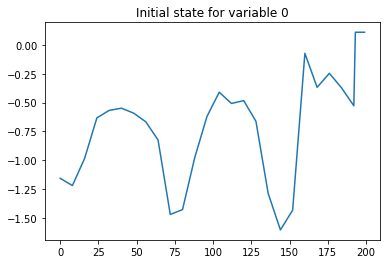

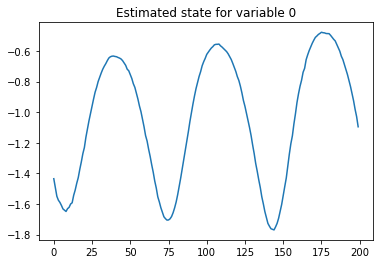

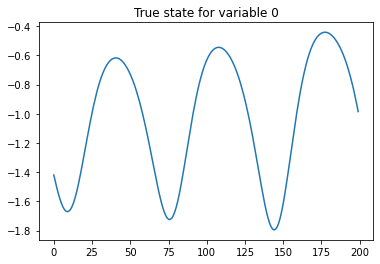

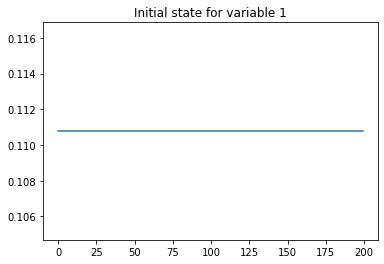

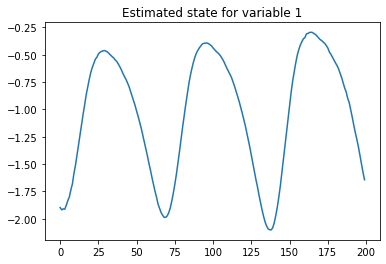

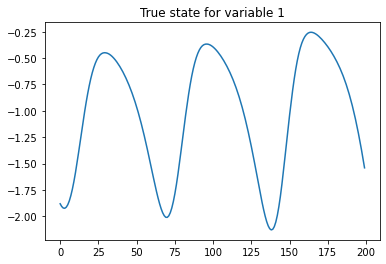

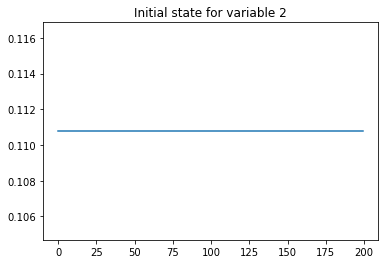

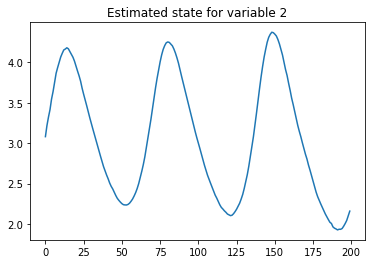

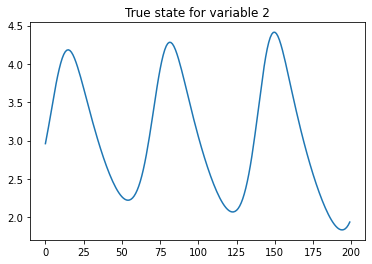

In [6]:
plt.figure()
plt.title('Initial state for variable 0')
plt.plot(init[100,0,:])

plt.figure()
plt.title('Estimated state for variable 0')
plt.plot(mu[100,0,:])

plt.figure()
plt.title('True state for variable 0')
plt.plot(target[100,0,:])

plt.figure()
plt.title('Initial state for variable 1')
plt.plot(init[100,1,:])

plt.figure()
plt.title('Estimated state for variable 1')
plt.plot(mu[100,1,:])

plt.figure()
plt.title('True state for variable 1')
plt.plot(target[100,1,:])

plt.figure()
plt.title('Initial state for variable 2')
plt.plot(init[100,2,:])

plt.figure()
plt.title('Estimated state for variable 2')
plt.plot(mu[100,2,:])

plt.figure()
plt.title('True state for variable 2')
plt.plot(target[100,2,:])


## Learned dynamical model

In [9]:
from models import Gradient_img, LitModel
import torch
ckpt_path ='Results/Experiment1/model_exp1.ckpt'
lit_cls = LitModel
mod = lit_cls.load_from_checkpoint(ckpt_path, 
                                                    mean_Tr=0, 
                                                    std_Tr = 0
                                                    )

In [10]:
mu_test = torch.zeros((2000,6,200))
mu_test[:,:3,:] = torch.Tensor(mu[:,:,:])
target_test = torch.zeros((2000,6,200))
target_test[:,:3,:] = torch.Tensor(target[:,:,:])

dyn_mu = mod.model.phi_r(mu_test).detach().numpy()
dyn_target = mod.model.phi_r(target_test).detach().numpy()

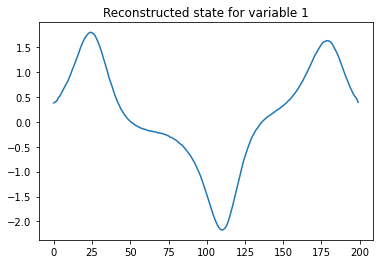

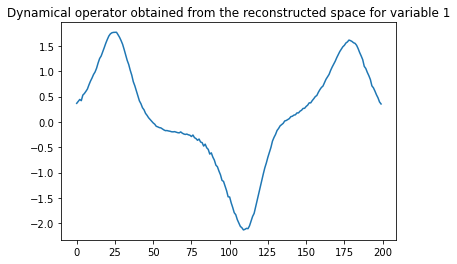

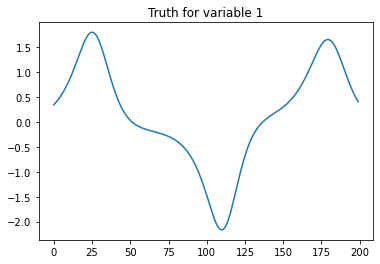

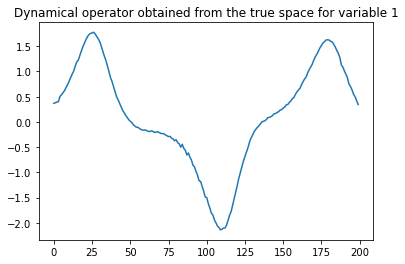

In [11]:
plt.figure()
plt.title("Reconstructed state for variable 1")
plt.plot(mu[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the reconstructed space for variable 1")
plt.plot(dyn_mu[0,0,:])

plt.figure()
plt.title("Truth for variable 1")
plt.plot(target[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the true space for variable 1")
plt.plot(dyn_target[0,0,:])


## Scores assessment

In [12]:
stdTr =7.937291887293479

print("R-score")
print(np.mean((mu[:,:,:]-target[:,:,:])**2)*stdTr**2)
print("4DVar-score")
FourDScore = 0.01*np.mean((init[:,:,:]-mu[:,:,:])*masks[:,:,:])**2/(np.sum(masks[:,:,:])) + np.mean((mu[:,:,:]-dyn_mu[:,:3,:])**2)
print(FourDScore*stdTr**2)
print("ODE-score")
print(np.mean((target[:,:,:]-dyn_target[:,:3,:])**2)*stdTr**2)

R-score
0.4749918408183286
4DVar-score
0.06308662248783083
ODE-score
0.055143508770747474


# Experiment 2

We reconstruct the mean state and the covariance which we force to be diagonal. 
We observe only the first variable every 8 time steps with a Gaussian noise on the observations in $\sqrt{2}$.

In [3]:
ncfile = Dataset('Results/Experiment2/test_exp2.nc')

print(ncfile)
mu = ncfile['preds']
prec = ncfile['p_diag']
init   = ncfile['inits']
target = ncfile['targets']
masks = ncfile['masks']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Nb_samples(2000), time(3), x(200)
    variables(dimensions): float32 preds(Nb_samples, time, x), float32 p_diag(Nb_samples, time, x), float32 inits(Nb_samples, time, x), float32 targets(Nb_samples, time, x), float32 masks(Nb_samples, time, x), float64 Nb_samples(Nb_samples), float64 time(time), float64 space(x)
    groups: 


## Visualization of the temporal evolution of the mean state and covariance of the three variables

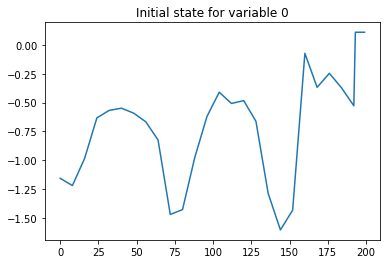

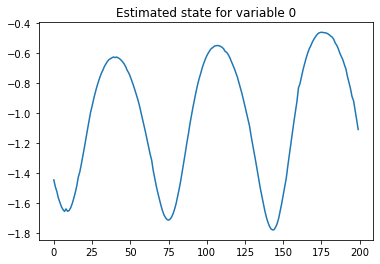

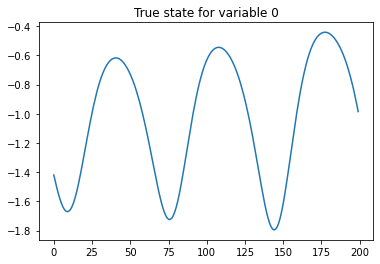

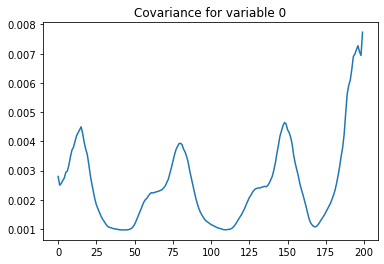

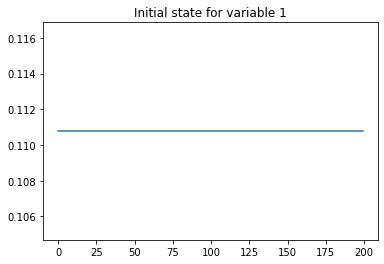

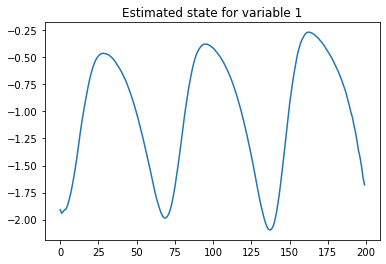

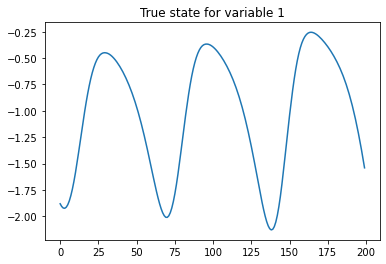

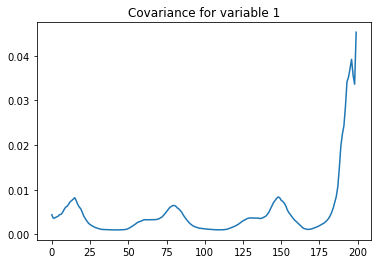

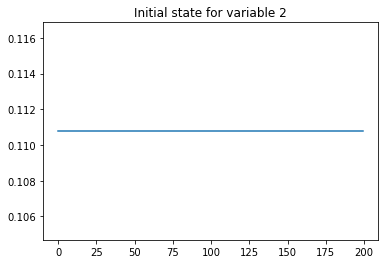

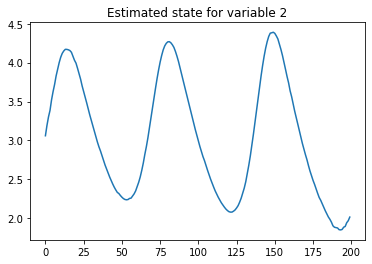

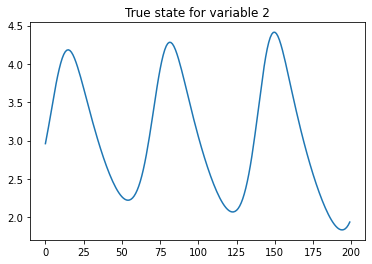

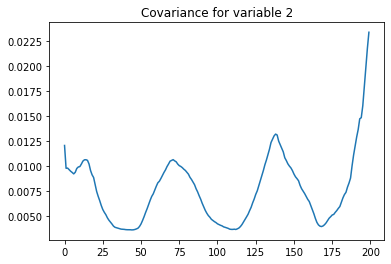

In [81]:
plt.figure()
plt.title('Initial state for variable 0')
plt.plot(init[100,0,:])

plt.figure()
plt.title('Estimated state for variable 0')
plt.plot(mu[100,0,:])

plt.figure()
plt.title('True state for variable 0')
plt.plot(target[100,0,:])

plt.figure()
plt.title('Covariance for variable 0')
plt.plot(1/((prec[100,0,:])*5)**2)


plt.figure()
plt.title('Initial state for variable 1')
plt.plot(init[100,1,:])

plt.figure()
plt.title('Estimated state for variable 1')
plt.plot(mu[100,1,:])

plt.figure()
plt.title('True state for variable 1')
plt.plot(target[100,1,:])

plt.figure()
plt.title('Covariance for variable 1')
plt.plot(1/(np.abs(prec[100,1,:])*5)**2)


plt.figure()
plt.title('Initial state for variable 2')
plt.plot(init[100,2,:])

plt.figure()
plt.title('Estimated state for variable 2')
plt.plot(mu[100,2,:])

plt.figure()
plt.title('True state for variable 2')
plt.plot(target[100,2,:])


plt.figure()
plt.title('Covariance for variable 2')
plt.plot(1/(np.abs(prec[100,2,:])*5)**2)




## Learned dynamical model

In [16]:
ckpt_path ='Results/Experiment2/model_exp2.ckpt'
lit_cls = LitModel
mod = lit_cls.load_from_checkpoint(ckpt_path, 
                                                    mean_Tr=0, 
                                                    std_Tr = 0
                                                    )

In [17]:
mu_test = torch.zeros((2000,6,200))
mu_test[:,:3,:] = torch.Tensor(mu[:,:,:])
mu_test[:,3:,:] = torch.Tensor(prec[:,:,:])

target_test = torch.zeros((2000,6,200))+1
target_test[:,:3,:] = torch.Tensor(target[:,:,:])
target_test[:,3:,:] = torch.Tensor(prec[:,:,:])

dyn_mu = mod.model.phi_r(mu_test).detach().numpy()
dyn_target = mod.model.phi_r(target_test).detach().numpy()

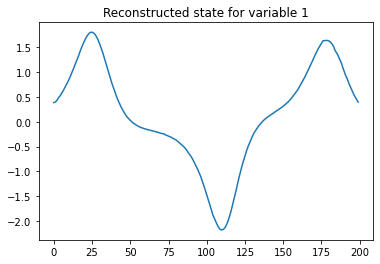

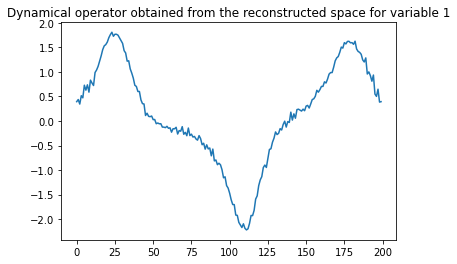

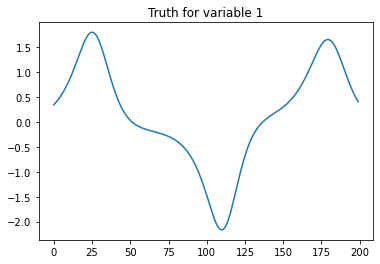

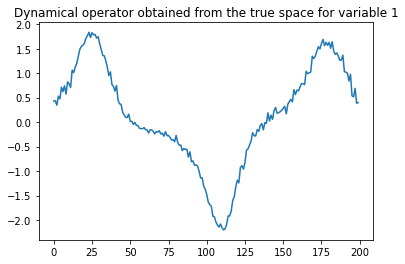

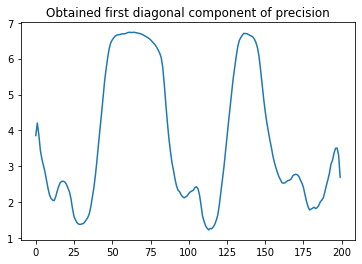

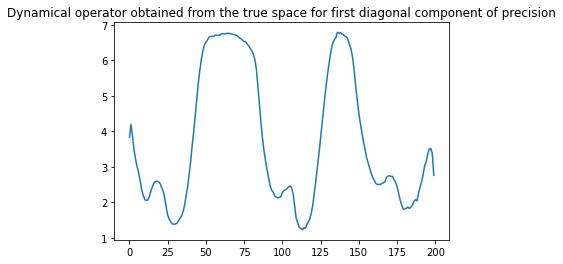

In [18]:
plt.figure()
plt.title("Reconstructed state for variable 1")
plt.plot(mu[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the reconstructed space for variable 1")
plt.plot(dyn_mu[0,0,:])

plt.figure()
plt.title("Truth for variable 1")
plt.plot(target[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the true space for variable 1")
plt.plot(dyn_target[0,0,:])



plt.figure()
plt.title("Obtained first diagonal component of precision")
plt.plot(np.abs(prec[0,1,:]))


plt.figure()
plt.title("Dynamical operator obtained from the true space for first diagonal component of precision")
plt.plot(np.abs(dyn_target[0,4,:]))




## Scores assessment

In [20]:
#Scores for mean state

stdTr =7.937291887293479

print("R-score")
print(np.mean((mu[:,:,:]-target[:,:,:])**2)*stdTr**2)
print("4DVar-score")
FourDScore = 0.01*np.mean((init[:,:,:]-mu[:,:,:])*masks[:,:,:])**2/(np.sum(masks[:,:,:])) + np.mean((mu[:,:,:]-dyn_mu[:,:3,:])**2)
print(FourDScore*stdTr**2)
print("ODE-score")
print(np.mean((target[:,:,:]-dyn_target[:,:3,:])**2)*stdTr**2)

R-score
0.42605755809160273
4DVar-score
0.12865309558192461
ODE-score
0.1743818616250543


In [19]:
#Likelihood score for the probability distribution (p-score)

def logarithmic_scores(t,mu,sig):
    return(0.5*(((t-mu)*sig*5)**2)-np.log(sig*5)+0.5*np.log(2*np.pi))

scores = np.mean(logarithmic_scores(target[:,:,:],mu[:,:,:],np.abs(prec[:,:,:])),0)

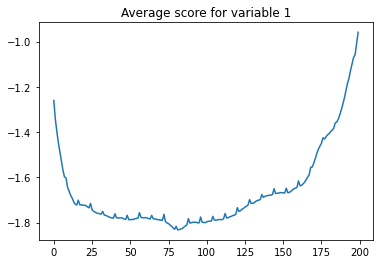

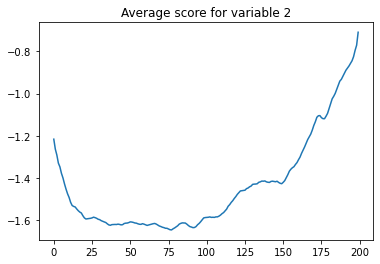

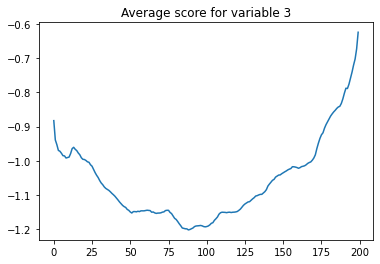

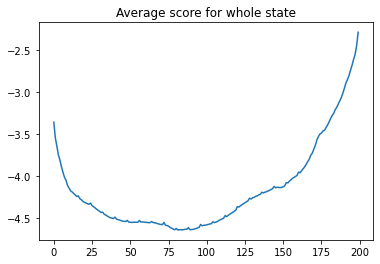

In [21]:
#Visualization of p-score evolution for each variable :
plt.figure()
plt.title("Average score for variable 1")
plt.plot(scores[0,:])

plt.figure()
plt.title("Average score for variable 2")
plt.plot(scores[1,:])

plt.figure()
plt.title("Average score for variable 3")
plt.plot(scores[2,:])

state_score = np.sum(scores,0)
plt.figure()
plt.title("Average score for whole state")
plt.plot(state_score)


In [22]:
print("P-score")
print(np.mean(state_score))
print("P-score for the center of the window")
print(np.mean(state_score[75:100]))

P-score
-4.163444218139648
P-score for the center of the window
-4.616247041015625


## Comparison between experiment 2 and Ensemble Kalman Filter

### Code of the Ensemble Kalman Filter

In [152]:
from scipy.integrate import solve_ivp


def AnDA_Lorenz_63(S,t,sigma,rho,beta):
#Lorenz-63 dynamical model. 
    x_1 = sigma*(S[1]-S[0]);
    x_2 = S[0]*(rho-S[2])-S[1];
    x_3 = S[0]*S[1] - beta*S[2];
    dS  = np.array([x_1,x_2,x_3]);
    return dS

def f(x):
    S = solve_ivp(fun=lambda t,y: AnDA_Lorenz_63(y,t,10.0,28.0,8.0/3),t_span=[0.,0.01,0.01+0.000001],y0=x,first_step=0.01,t_eval=[0.01],method='RK45')
    return S['y'][:,0]

In [153]:
from new_dataloading import X_test_obs,dataTestNoNaN
new_t =dataTestNoNaN
nb_obs = 3
m = 0.8792832530527092
s   =7.937291887293479
new_t =target[:,:,:]*s + m

R = (np.sqrt(2)* np.eye(3))**2
maskobs2 = np.zeros((2000,3,200))
maskobs2[:,1,np.arange(0,200,8)]=1
X_test_obs2 = X_test_obs + dataTestNoNaN*maskobs2+ np.sqrt(2) * maskobs2* np.random.randn(2000,3,200)
maskobs3 = np.zeros((2000,3,200))
maskobs3[:,2,np.arange(0,200,8)]=1
X_test_obs3 = X_test_obs2 + dataTestNoNaN*maskobs3+ np.sqrt(2) * maskobs3 * np.random.randn(2000,3,200)
print()
print(np.mean(((X_test_obs-dataTestNoNaN)[:,0,np.arange(0,200,8)])**2))    
print(np.mean(((X_test_obs3-dataTestNoNaN)[:,:,np.arange(0,200,8)])**2))    

dT = 200
dX = 3
N = 1000
N_test=2000

H1 = np.array([[1,0,0],[0,0,0],[0,0,0]])
H2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
H3 = np.array([[0,0,0],[0,0,0],[0,0,1]])
H = [H1,H2,H3]
H_all = np.eye(3)

#Choice of observation model
if nb_obs == 1: 
    x_obs = X_test_obs
    Hi=H1
elif nb_obs == 2:
    x_obs = X_test_obs2
    Hi=H1+ H2
elif nb_obs == 3:
    x_obs= X_test_obs3
    Hi= H_all



1.9928679645287228
2.0008837488959728


In [154]:
def update2(x,P,z, H, R):
    A  = np.dot(P,np.transpose(H))
    S = np.linalg.inv(np.dot(H,A)+R)
    K = np.dot(A,S)
    x_a = x - np.dot(K,(np.dot(H,x)-z))
    x_a = np.expand_dims(x_a,-1)
    I = np.eye(3)
    P_a = np.dot(I-np.dot(K,H),P)
    return x_a, P_a
def forecast(x,P,fun,N):
    Ens = np.random.default_rng().multivariate_normal(x,P,N)
    dim_x = len(x)
    Ens_update = np.zeros((N, dim_x,1))
    for i in range(N):
        Ens_update[i,:,:]=np.expand_dims(fun(Ens[i]),-1)
     
    x_f = np.mean(Ens_update,axis=0)
    x_diff = Ens_update-x_f
    P_f = np.sum(np.matmul(x_diff,np.transpose(x_diff,axes=[0,2,1])),0)/(N-1)
    
    return x_f,P_f

In [130]:
ind = 150
print(init.shape)
x_init =X_test_obs3[ind,:,0]
P_init=R   
x_tot = np.zeros((200,3))
P_tot = np.zeros((200,3,3))
x_tot[0,:]=x_init
P_tot [0,:,:] = P_init
for i in range(1,200):
    #print(P_tot[:5,:,:])
    x_f,P_f = forecast(x_init,P_init,f,N)
    if i%8==0:
        x_a,P_a = update2(x_f[:,0],P_f,x_obs[ind,:,i],Hi,R)
    else : 
        x_a,P_a = x_f,P_f
    x_tot[i,:]=x_a[:,0]
    P_tot[i,:,:] = P_a
    x_init = x_a[:,0]
    P_init = P_a
    print(np.mean((x_init-new_t[ind,:,i])**2))


(2000, 3, 200)
1.1385716626024645
1.0956712456186102
1.0409265098410319
0.9724733892834965
0.8858431472156916
0.8461011543912774
0.7686421112165083
0.4763021740294661
0.514658049535921
0.5487115958286984
0.5935079983760277
0.6151188224643834
0.7028585747278484
0.7451906523059577
0.8306134717762346
0.8349684898194738
0.904639936270977
1.0478004148790034
1.0548068565430455
1.2456184480447328
1.4074725544513023
1.599175887717208
1.792741467809722
0.28141366617777674
0.244982909187717
0.22793500533525923
0.19913142060438416
0.18556157262046802
0.17112585134743055
0.16980379845551327
0.17133548129739906
0.2579145681261106
0.23695243015572154
0.24683018161492942
0.24857402351121763
0.2615923040972101
0.2424228848787866
0.22208016392598806
0.21106440738150076
0.22081349478532722
0.21042091603702642
0.1910013478073008
0.17921677877976108
0.1696703270671346
0.1524291009469312
0.13945377507370874
0.1301579554039479
0.11950197177576038
0.11264103598266768
0.11665576233293738
0.11729282088605009
0

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
(3, 200)
Variance for each variable
[0.21825659 0.73943768 0.44610882]
R-score
0.46793436649056996
[[ 3.11644560e-01  2.49870342e-01  2.33488607e-01  2.01293332e-01
   1.49781397e-01  1.34812172e-01  9.87730758e-02  6.40562131e-02
  -2.96427331e-01 -3.36165269e-01 -3.84135736e-01 -4.13741988e-01
  -4.25399412e-01 -4.74659978e-01 -4.89086959e-01 -5.17247140e-01
  -6.38367227e-01 -6.52767991e-01 -6.96999791e-01 -6.82981031e-01
  -7.41611989e-01 -7.58390782e-01 -7.68599335e-01 -7.64128538e-01
  -2.93721352e-02  3.88475525e-02  8.31095886e-02  1.31189305e-01
   1.74056595e-01  2.24282839e-01  2.78109132e-01  3.33295211e-01
   4.39509139e-01  4.38507851e-01  4.50000217e-01  4.42230373e-01
   4.33061251e-01  3.99525561e-01  3.48341558e-01  2.83470521e-01
   4.39096377e-01  4.10403341e-01  3.66536526e-01  3.26847962e-01
   2.70316174e-01  2.07513036e-01  1.63773179e-01  1.20668270e-01
   4.58090402e-02  1.83934205e-02 -1.73669266e-02 -6.41405545e-02
  -1.0

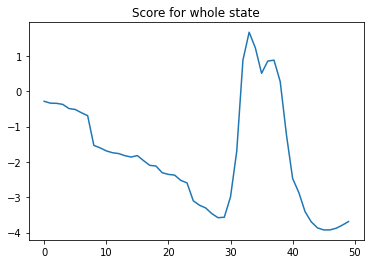

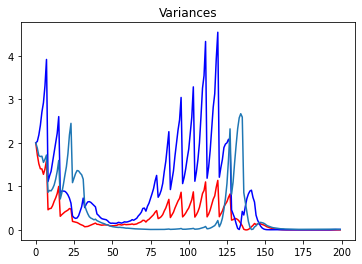

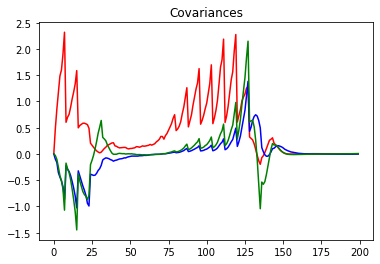

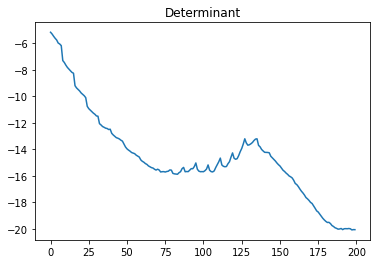

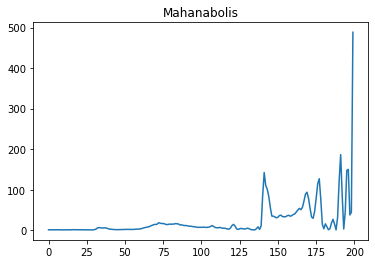

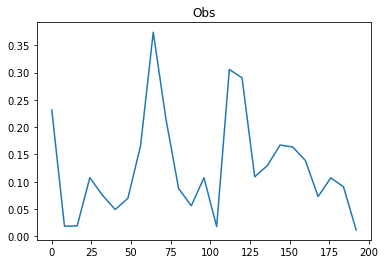

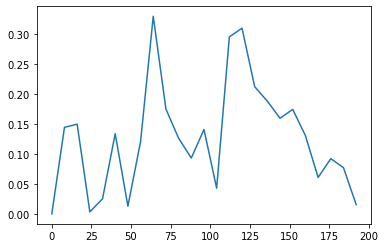

In [131]:
print(P_tot[0,:,:])
print(target[ind,:,:].shape)

def log_scores_matrix(target,mu,cov):
    return(0.5*(np.dot(np.dot((target-mu).T,np.linalg.inv(cov)),(target-mu))+0.5*np.log(np.linalg.det(cov))+1.5*np.log(2*np.pi)))


print("Variance for each variable")
print(np.mean((new_t[ind,:,:]-np.transpose(x_tot[:,:]))**2,1))
print("R-score")
print(np.mean((new_t[ind,:,:]-np.transpose(x_tot[:,:]))**2))
x_tot_n = (x_tot-m)/s
P_tot_n = P_tot/s**2
scores = np.zeros(200)
Maha = np.zeros(200)

for j in range(200):  
    scores[j] = log_scores_matrix((dataTestNoNaN[ind,:,j]-m)/s,x_tot_n[j,:],(P_tot_n[j,:,:]))
    Maha[j]  = 0.5*(np.dot(np.dot((target[ind,:,j]-x_tot_n[j,:]).T,np.linalg.inv(P_tot_n[j,:,:])),(target[ind,:,j]-x_tot_n[j,:])))

print(new_t[ind,:,:]-x_tot[:,:].T)
%matplotlib inline
plt.figure()
plt.title("Score for whole state")
plt.plot(scores[:50])

plt.figure()
plt.title("Variances")
plt.plot(P_tot[:,0,0],color='r')
plt.plot(P_tot[:,1,1],color='b')
plt.plot(P_tot[:,2,2])
plt.figure()
plt.title("Covariances")
plt.plot(P_tot[:,0,1],color='r')
plt.plot(P_tot[:,0,2],color='b')
plt.plot(P_tot[:,1,2],color='g')

plt.figure()
plt.title("Determinant")
plt.plot(0.5*np.log(np.linalg.det(P_tot_n[:,:,:])))
print("P-score")
print(np.mean(scores[:50]))
plt.figure()
plt.title("Mahanabolis")
plt.plot(Maha[:])
plt.figure()
plt.title("Obs")
Abs_mean = np.abs((X_test_obs3[ind,:,:]-new_t[ind,:,:]).T/s)
plt.plot(np.arange(0,200,8),Abs_mean[np.arange(0,200,8),2])
plt.figure()
Abs_pred = np.abs((X_test_obs3[ind,:,:].T-x_tot[:,:])/s)
plt.plot(np.arange(0,200,8),Abs_pred[np.arange(0,200,8),2])


### Covering map for EnKF

(200, 3, 3)
(200, 3)


<Figure size 432x288 with 0 Axes>

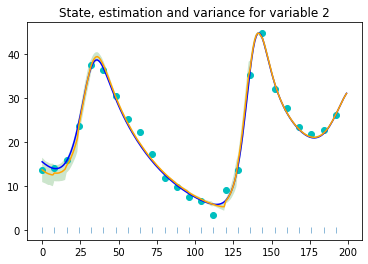

<Figure size 432x288 with 0 Axes>

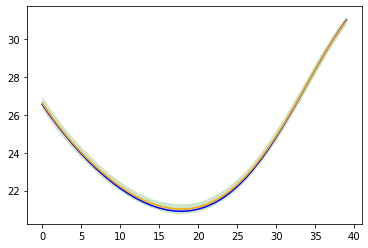

In [136]:
variable = 2
print(P_tot.shape)
ci = 1.96*np.sqrt(P_tot[:,variable,variable])
print(x_tot_n.shape)
x = x_tot[:,variable]
plt.figure()
fig, ax = plt.subplots()

ax.fill_between(range(200), (x-ci), (x+ci), facecolor='g', alpha=0.2)
plt.title(f'State, estimation and variance for variable {variable}')
plt.plot(new_t[ind,variable,:],color='blue')
plt.plot(x,color='orange')
plt.scatter(np.arange(0,200,8),0*np.arange(0,200,8),marker ='|', linewidth=0.5,)
#for y in np.arange(0,200,8):
#    plt.axvline(y, color = 'r', label = 'axvline - full height', linestyle=':')

plt.scatter(np.arange(0,200,8),X_test_obs3[ind,variable,np.arange(0,200,8)],color='c')
    
plt.figure()
fig, ax = plt.subplots()
ax.fill_between(range(40), (x[160:]-ci[160:]), (x[160:]+ci[160:]), facecolor='g', alpha=0.2)
plt.plot(new_t[ind,variable,160:],color='blue')
plt.plot(x[160:],color='orange')


### Running EnsKF for the whole dataset

In [155]:
N_obs =nb_obs
Mu_res = np.zeros((N_test,dT,dX))
P_res = np.zeros((N_test,dT,dX,dX))
c=0
Ind = np.random.permutation(2000)[:50]
for ind in Ind: 
    print(ind)
    x_init =X_test_obs3[ind,:,0]
    P_init=R   
    x_tot = np.zeros((200,3))
    P_tot = np.zeros((200,3,3))
    x_tot[0,:]=x_init
    P_tot [0,:,:] = P_init
    for i in range(1,200):
        #print(P_tot[:5,:,:])
        x_f,P_f = forecast(x_init,P_init,f,N)
        if i%8==0:
            x_a,P_a = update2(x_f[:,0],P_f,x_obs[ind,:,i],Hi,R)
        else : 
            x_a,P_a = x_f,P_f
        x_tot[i,:]=x_a[:,0]
        P_tot[i,:,:] = P_a
        x_init = x_a[:,0]
        P_init = P_a
    print(np.mean((x_tot-np.transpose(dataTestNoNaN[ind,:,:]))**2))
    Mu_res[ind,:,:] = x_tot
    P_res[ind,:,:,:] = P_tot
    c+=1
    print(c)
        

1918
0.576583513646974
1
946
0.1292357537342901
2
529
0.27944429367017104
3
977
0.12062757050489022
4
143
0.41290349060511644
5
755
0.1803510502370488
6
486
0.47099462721058644
7
809
0.36179077789639746
8
1538
0.40594309335072976
9
995
0.5480573664352626
10
951
0.41201680101884364
11
1945
0.18976687783494822
12
850
0.3587362055882707
13
1867
0.18623794288554898
14
712
0.32043617583144335
15
234
0.1727952380698902
16
1016
0.5092466438751979
17
737
0.1686527294146434
18
171
0.3480808625464073
19
214
0.29790580591692073
20
405
0.38277400141776613
21
1069
0.15313986621823866
22
464
0.24949193963492572
23
1863
0.3374074054076617
24
882
0.4526935881389476
25
1229
1.0000296824423416
26
1473
0.24538779528196666
27
1472
0.34207233290975064
28
1690
0.48150251763077373
29
1031
0.3800896853793843
30
233
0.7163893470730307
31
1616
0.3755427704621195
32
676
0.1742878668171209
33
216
0.15057743913508057
34
1923
0.6403812737892851
35
776
0.2016676369996038
36
1649
0.39221993359836105
37
375
0.29014521

(2000, 200, 3)
R-score
0.364785098066655
50
(50, 3, 200)


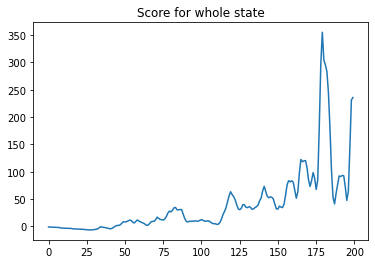

[[0.13024697 0.13836877 0.10354893]
 [0.13836877 0.25296971 0.0146167 ]
 [0.10354893 0.0146167  0.16828712]]
[[ 30402.52965268 -15627.02956848 -17349.71592062]
 [-15627.02956848   8036.33265399   8917.48270956]
 [-17349.71592062   8917.48270956   9906.87998233]]
P-score
40.00322234244706


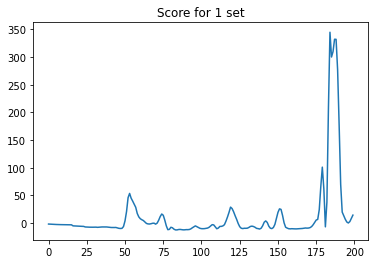

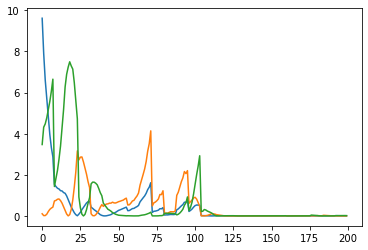

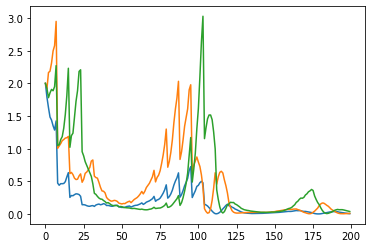

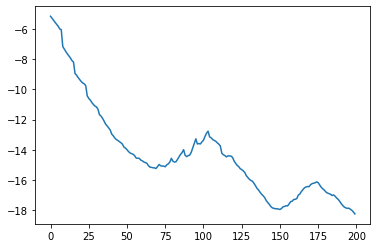

In [159]:
%matplotlib inline 
def log_scores_matrix(target,mu,prec):
    return(0.5*(np.dot((np.dot((target-mu).T,prec)),(target-mu)))-0.5*np.log(np.linalg.det(prec))+1.5*np.log(2*np.pi))

print(Mu_res.shape)
A = np.transpose(Mu_res[Ind,:,:],(0,2,1))
print("R-score")
print(np.mean((dataTestNoNaN[Ind,:,:]-A)**2))
Size = Ind.shape[0]
print(Size)
scores_tot = np.zeros((Size, 200))

for i in range(Size):
    x_tot_n = (Mu_res[Ind[i],:,:]-m)/s
    P_tot_n = P_res[Ind[i],:,:,:]/s**2
    #print(P_tot_n[0:10,:,:])
    x_true_n= (dataTestNoNaN[Ind[i],:,:]-m)/s
    scores = np.zeros(200)           
    for j in range(200):  
        scores[j] = log_scores_matrix(x_true_n[:,j],x_tot_n[j,:],np.linalg.inv(P_tot_n[j,:,:]))
        #print(scores[j])
    scores_tot[i,:]=scores

print(((dataTestNoNaN[Ind,:,:]-A)**2).shape)
plt.figure()
plt.title("Score for whole state")
plt.plot(np.mean(scores_tot,0))
plt.show()

plt.figure()
plt.title("Score for 1 set")
plt.plot(scores_tot[2,:])
plt.figure()
plt.plot(((dataTestNoNaN[Ind,:,:]-A)**2)[0,0,:])
plt.plot(((dataTestNoNaN[Ind,:,:]-A)**2)[0,1,:])
plt.plot(((dataTestNoNaN[Ind,:,:]-A)**2)[0,2,:])
plt.figure()
print(P_res[Ind[0],40,:,:])
print(np.linalg.inv(P_res[Ind[0],40,:,:]))
plt.plot(P_res[Ind[0],:,0,0])
plt.plot(P_res[Ind[0],:,1,1])
plt.plot(P_res[Ind[0],:,2,2])
plt.figure()
plt.plot(-0.5*np.log(np.linalg.det(np.linalg.inv((P_res[Ind[0],:,:,:]/s**2)))))
#plt.plot(0.5*(np.dot((np.dot((target-mu).T,np.linalg.inv((P_res[Ind[0],:,:,:]/s**2)))),(target-mu))))
print("P-score")
print(np.mean(scores_tot))              

#### Confidence interval

In [61]:

diff = np.abs(np.transpose(dataTestNoNaN[Ind,:,:],(0,2,1))-Mu_res[Ind,:,:])**2
print(diff.shape)
sig = P_res[Ind,:,:,:]
#First Variable
print("First variable")
print("1-sigma uncertainty")
print((np.sum(diff[:,:,0]>sig[:,:,0,0]))/2000)
print("2-sigma uncertainty")
print((np.sum(diff[:,:,0]>2*sig[:,:,0,0]))/2000)
print("3-sigma uncertainty")
print((np.sum(diff[:,:,0]>3*sig[:,:,0,0]))/2000)
#2nd variable
print("Second variable")
print("1-sigma uncertainty")
print((np.sum(diff[:,:,1]>sig[:,:,1,1]))/2000)
print("2-sigma uncertainty")
print((np.sum(diff[:,:,1]>2*sig[:,:,1,1]))/2000)
print("3-sigma uncertainty")
print((np.sum(diff[:,:,1]>3*sig[:,:,1,1]))/2000)
#3rd variable
print("Third variable")
print("1-sigma uncertainty")
print((np.sum(diff[:,:,2]>sig[:,:,2,2]))/2000)
print("2-sigma uncertainty")
print((np.sum(diff[:,:,2]>2*sig[:,:,2,2]))/2000)
print("3-sigma uncertainty")
print((np.sum(diff[:,:,2]>3*sig[:,:,2,2]))/2000)

(10, 200, 3)
1-sig uncertainty
0.368
2-sig uncertainty
0.234
3-sig uncertainty
0.163
1-sig uncertainty
0.372
2-sig uncertainty
0.243
3-sig uncertainty
0.154
1-sig uncertainty
0.3465
2-sig uncertainty
0.197
3-sig uncertainty
0.121


# Experiment 3

We reconstruct the mean state and the full covariance. We observe only the first variable every 8 time steps with Gaussian noise on the observations in $\sqrt{2}$. The covariance is initialized to the diagonal covariance found in experiment 2

In [137]:
ncfile = Dataset('Results/Experiment3/test_exp2.nc')
print(ncfile)

mu = ncfile['preds']
prec = ncfile['p_diag']
prec_out = ncfile['p_outdiag']
init   = ncfile['inits']
target = ncfile['targets']
masks = ncfile['masks']
print(mu[:,:,:].shape)

p_state = np.zeros((2000,200,3,3))
ind_diag = np.array(([[0,1,2],[0,1,2]]))
ind_sup  = np.array(([[0,0,1],[1,2,2]]))
ind_inf  = np.array(([[1,2,2],[0,0,1]]))                 
                                 
p_state[:,:,ind_diag[0],ind_diag[1]] = np.transpose(prec[:,:,:],axes=[0,2,1])*5
p_state[:,:,ind_sup[0],ind_sup[1]] = np.transpose(prec_out[:,:,:],axes=[0,2,1])
p_state[:,:,ind_inf[0],ind_inf[1]] = np.transpose(prec_out[:,:,:],axes=[0,2,1])
                   
p_state = np.matmul(p_state ,p_state)
cov = np.linalg.inv(p_state)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Nb_samples(2000), time(3), x(200)
    variables(dimensions): float32 preds(Nb_samples, time, x), float32 p_diag(Nb_samples, time, x), float32 p_outdiag(Nb_samples, time, x), float32 inits(Nb_samples, time, x), float32 targets(Nb_samples, time, x), float32 masks(Nb_samples, time, x), float64 Nb_samples(Nb_samples), float64 time(time), float64 space(x)
    groups: 
(2000, 3, 200)


### Lorenz plot

<ipython-input-12-94d3b6ad4494>:17: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  fig.add_axes()


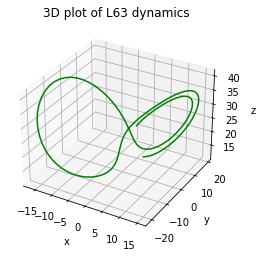

In [12]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = new_t[0,2,:]
x = new_t[0,0,:]
y = new_t[0,1,:]
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D plot of L63 dynamics')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.add_axes()
plt.show()

-2.3123481
(2, 589)


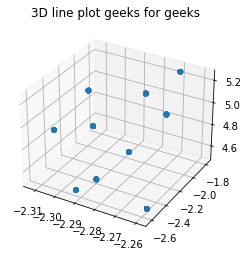

In [11]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes

z = target[:,2,:]
x = target[:,0,:]
y = target[:,1,:]
ind=np.where(x<-2.25)
print(np.min(x))
print(np.shape(ind))
z=z[ind]
x=x[ind]
y=y[ind]
# plotting
ax.scatter(x, y, z, 'green')
ax.set_title('3D line plot')
plt.show()

## Visualization of the temporal evolution for the three variables


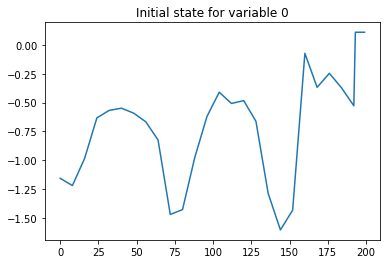

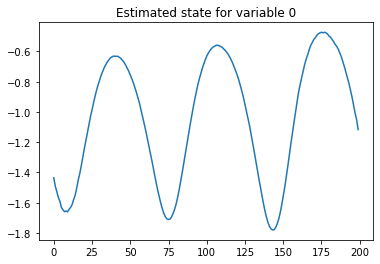

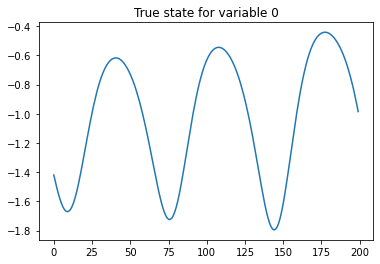

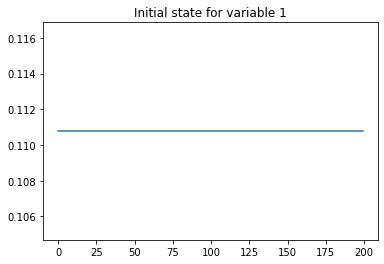

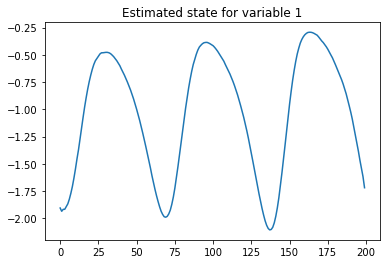

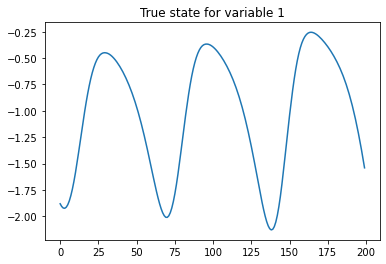

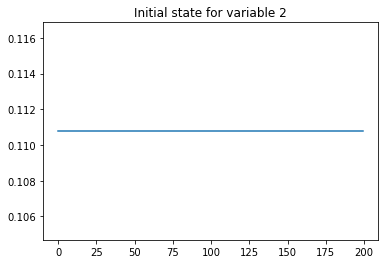

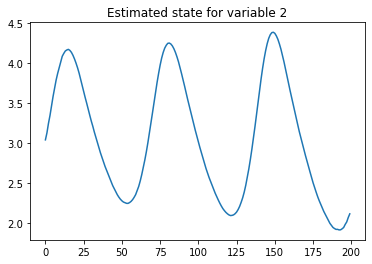

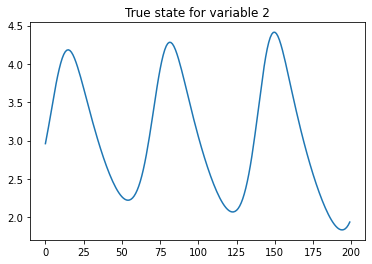

In [13]:
plt.close()

plt.figure()
plt.title('Initial state for variable 0')
plt.plot(init[100,0,:])

plt.figure()
plt.title('Estimated state for variable 0')
plt.plot(mu[100,0,:])

plt.figure()
plt.title('True state for variable 0')
plt.plot(target[100,0,:])

plt.figure()
plt.title('Initial state for variable 1')
plt.plot(init[100,1,:])

plt.figure()
plt.title('Estimated state for variable 1')
plt.plot(mu[100,1,:])

plt.figure()
plt.title('True state for variable 1')
plt.plot(target[100,1,:])

plt.figure()
plt.title('Initial state for variable 2')
plt.plot(init[100,2,:])

plt.figure()
plt.title('Estimated state for variable 2')
plt.plot(mu[100,2,:])

plt.figure()
plt.title('True state for variable 2')
plt.plot(target[100,2,:])
plt.show()

## Visualization of the temporal evolution for covariance values

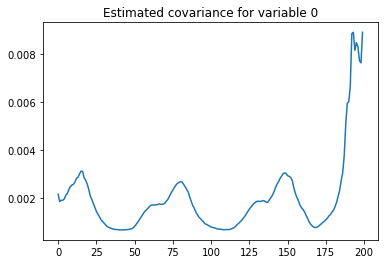

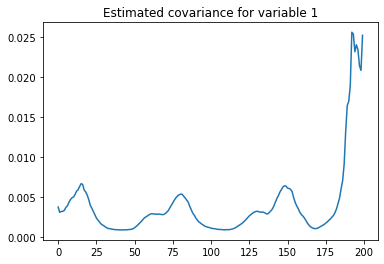

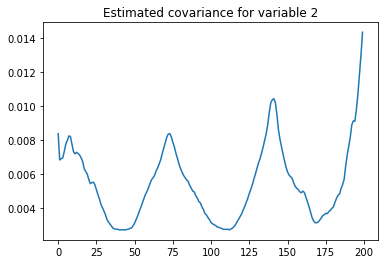

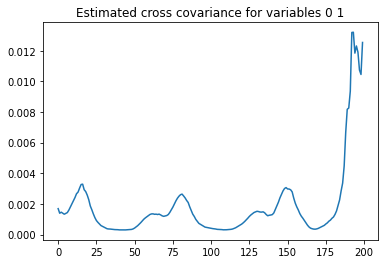

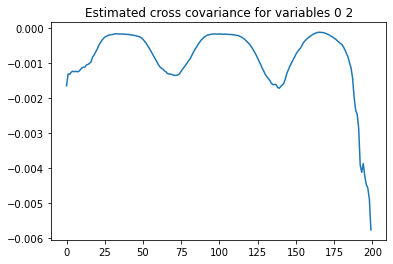

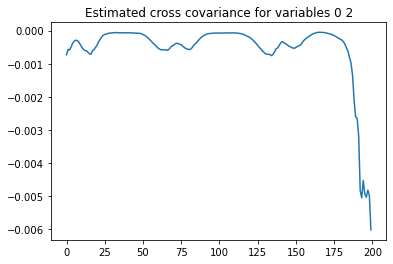

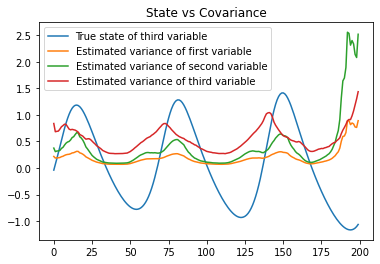

In [66]:
plt.figure()
plt.title('Estimated covariance for variable 0')
plt.plot(cov[100,:,0,0])

plt.figure()
plt.title('Estimated covariance for variable 1')
plt.plot(cov[100,:,1,1])


plt.figure()
plt.title('Estimated covariance for variable 2')
plt.plot(cov[100,:,2,2])

plt.figure()
plt.title('Estimated cross covariance for variables 0 1')
plt.plot(cov[100,:,0,1])

plt.figure()
plt.title('Estimated cross covariance for variables 0 2')
plt.plot(cov[100,:,0,2])

plt.figure()
plt.title('Estimated cross covariance for variables 0 2')
plt.plot(cov[100,:,1,2])

plt.figure()
plt.title('State vs Covariance')
plt.plot(target[100,2,:]-3, label = 'True state of third variable')
plt.plot(100*cov[100,:,0,0], label ='Estimated variance of first variable')
plt.plot(100*cov[100,:,1,1], label ='Estimated variance of second variable' )
plt.plot(100*cov[100,:,2,2], label = 'Estimated variance of third variable')
plt.legend()

### Covering map visualization

(2000, 200, 3, 3)


<Figure size 432x288 with 0 Axes>

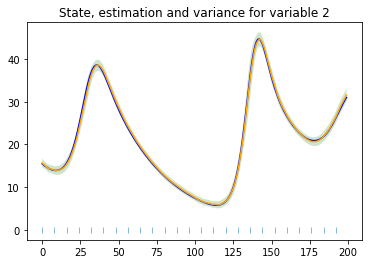

In [141]:
variable = 2
ind=150
print(cov.shape)
ci = s*1.96*np.sqrt(cov[ind,:,variable,variable])
x = (m+mu[ind,variable,:]*s)
plt.figure()
fig, ax = plt.subplots()

ax.fill_between(range(200), (x-ci), (x+ci), facecolor='g', alpha=0.2)
plt.title(f'State, estimation and variance for variable {variable}')
plt.plot(new_t[ind,variable,:],color='blue')
plt.plot(x,color='orange')
plt.scatter(np.arange(0,200,8),0*np.arange(0,200,8),marker ='|', linewidth=0.5,)
#for y in np.arange(0,200,8):
#    plt.axvline(y, color = 'r', label = 'axvline - full height', linestyle=':')
if variable ==0 :
    plt.scatter(np.arange(0,200,8),X_test_obs[ind,variable,np.arange(0,200,8)],color='c')



## Learned dynamical model

In [8]:
from models import Gradient_img, LitModel
import torch

ckpt_path ='Results/Experiment3/model_exp3.ckpt'

lit_cls = LitModel

mod = lit_cls.load_from_checkpoint(ckpt_path, 
                                                    mean_Tr=0, 
                                                    std_Tr = 0
                                                    )


In [9]:
mu_test = torch.zeros((2000,9,200))
mu_test[:,:3,:] = torch.Tensor(mu[:,:,:])
mu_test[:,3:6,:] = torch.Tensor(prec[:,:,:])
mu_test[:,6:,:] = torch.Tensor(prec_out[:,:,:])

target_test = torch.zeros((2000,9,200))
target_test[:,:3,:] = torch.Tensor(target[:,:,:])
target_test[:,3:6,:] = torch.Tensor(prec[:,:,:])
target_test[:,6:,:] = torch.Tensor(prec_out[:,:,:])

dyn_mu = mod.model.phi_r(mu_test).detach().numpy()

dyn_target = mod.model.phi_r(target_test).detach().numpy()

/home/VM-Nicolas-Lafon/These/4Dvarnetstochastic/Lorenz63/models.py:59: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554798336/work/torch/csrc/utils/python_arg_parser.cpp:1005.)
  x   = torch.add(x,1.,xHR)


<Figure size 432x288 with 0 Axes>

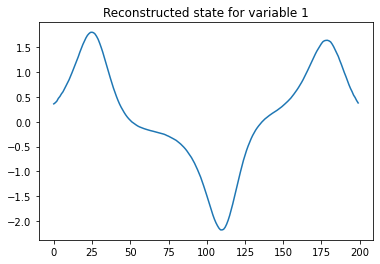

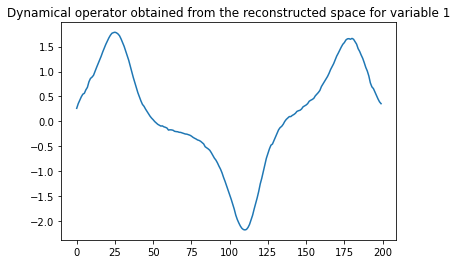

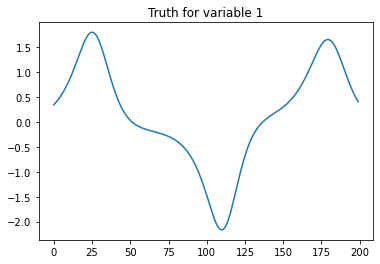

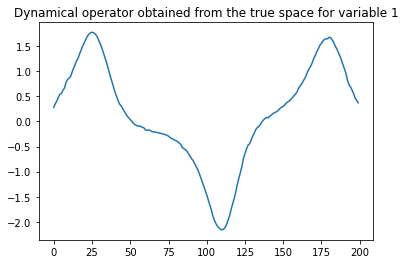

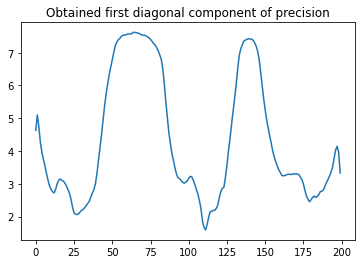

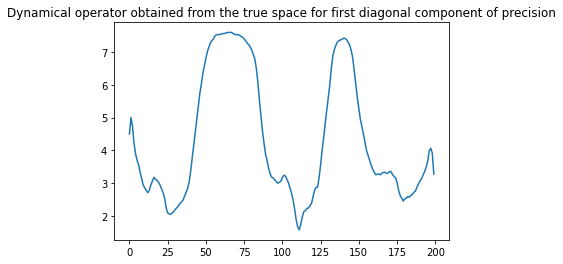

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure()
plt.title("Reconstructed state for variable 1")
plt.plot(mu[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the reconstructed space for variable 1")
plt.plot(dyn_mu[0,0,:])

plt.figure()
plt.title("Truth for variable 1")
plt.plot(target[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the true space for variable 1")
plt.plot(dyn_target[0,0,:])

plt.figure()
plt.title("Obtained first diagonal component of precision")
plt.plot(np.abs(prec[0,1,:]))


plt.figure()
plt.title("Dynamical operator obtained from the true space for first diagonal component of precision")
plt.plot(np.abs(dyn_target[0,4,:]))

plt.figure()


## Scores assessment

In [11]:
#Scores on mean state

stdTr =7.937291887293479

print("R-score")
print(np.mean((mu[:,:,:]-target[:,:,:])**2)*stdTr**2)
print("4DVar-score")
FourDScore = 0.01*np.mean((init[:,:,:]-mu[:,:,:])*masks[:,:,:])**2/(np.sum(masks[:,:,:])) + np.mean((mu[:,:,:]-dyn_mu[:,:3,:])**2)
print(FourDScore*stdTr**2)
print("ODE-score")
print(np.mean((target[:,:,:]-dyn_target[:,:3,:])**2)*stdTr**2)


R-score
0.4466868260781124
4DVar-score
0.022785123557802118
ODE-score
0.0352620577628218


In [12]:
def log_scores_matrix(target,mu,prec):
    return(0.5*(np.dot((np.dot((target-mu).T,prec)),(target-mu)))-0.5*np.log(np.linalg.det(prec))+1.5*np.log(2*np.pi))

scores = np.zeros((mu.shape[0],mu.shape[2]))

for i in range(mu.shape[0]):
    for j in range(mu.shape[2]):
        scores[i,j] = log_scores_matrix(target[i,:,j],mu[i,:,j],p_state[i,j,:,:])
        


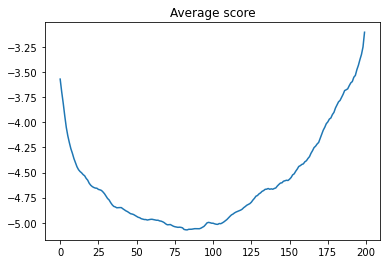

In [19]:
mean_score = np.mean(scores,0)

#Visualization of p-score evolution of each variable :

plt.figure()
plt.title("Average score")
plt.plot(mean_score)


In [21]:
print("P-score")
print(np.mean(mean_score))
print("P-score for the center of the window")
print(np.mean(mean_score[75:100]))

P-score
-4.596045925054369
P-score for the center of the window
-5.04512354559656


#### Confidence interval

In [62]:
cov_v1 = cov[:,:,0,0]
cov_v2 = cov[:,:,1,1]
cov_v3 = cov[:,:,2,2]
diff =np.abs(target[:,0,:]-mu[:,0,:])
print("IC 1Sigma")
print(np.sum(diff**2>cov_v1)/400000)
print("IC 2Sigma")
print(np.sum(diff**2>2*cov_v1)/400000)
print("IC 3Sigma")
print(np.sum(diff**2>3*cov_v1)/400000)
diff =np.abs(target[:,1,:]-mu[:,1,:])
print("IC 1Sigma")
print(np.sum(diff**2>cov_v2)/400000)
print("IC 2Sigma")
print(np.sum(diff**2>2*cov_v2)/400000)
print("IC 3Sigma")
print(np.sum(diff**2>3*cov_v2)/400000)
diff =np.abs(target[:,2,:]-mu[:,2,:])
print("IC 1Sigma")
print(np.sum(diff**2>cov_v3)/400000)
print("IC 2Sigma")
print(np.sum(diff**2>2*cov_v3)/400000)
print("IC 3Sigma")
print(np.sum(diff**2>3*cov_v3)/400000)






(2000, 200)
(2000, 200)
IC 1Sigma
0.3023125
IC 2Sigma
0.1748575
IC 3Sigma
0.1115275
(2000, 200)
(2000, 200)
IC 1Sigma
0.2869675
IC 2Sigma
0.1653575
IC 3Sigma
0.10737
(2000, 200)
(2000, 200)
IC 1Sigma
0.3210675
IC 2Sigma
0.185155
IC 3Sigma
0.1180025


# Experiment 4

We reconstruct the mean state and the diagonal covariance of the Gaussian a priori. We observe only the first variable every 8 time steps with a Gaussian noise on the observations in sqrt(2), and a white noise governed by a Gamma parameter on the model. We use the scheme proposed by $\mathbf{Chapron\ et \ al.}$ $(2017)$. 

In [3]:
ncfile = Dataset('Results/Experiment4/test_exp4.nc')

print(ncfile)
mu = ncfile['preds']
prec = ncfile['p_diag']
init   = ncfile['inits']
target = ncfile['targets']
masks = ncfile['masks']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Nb_samples(2000), time(3), x(200)
    variables(dimensions): float32 preds(Nb_samples, time, x), float32 p_diag(Nb_samples, time, x), float32 inits(Nb_samples, time, x), float32 targets(Nb_samples, time, x), float32 masks(Nb_samples, time, x), float64 Nb_samples(Nb_samples), float64 time(time), float64 space(x)
    groups: 


## Visualization of the temporal evolution of the mean state and covariance of the three variables


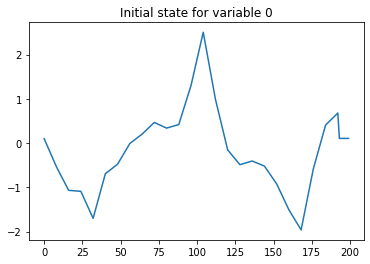

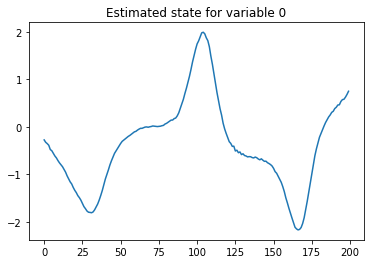

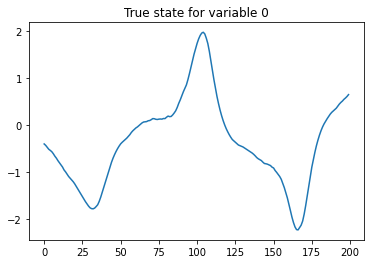

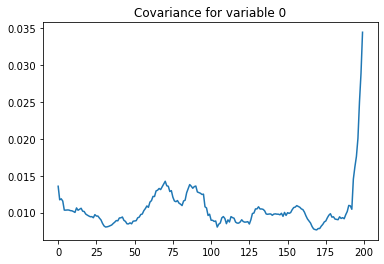

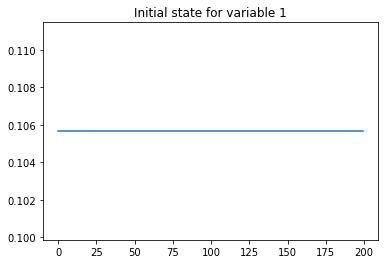

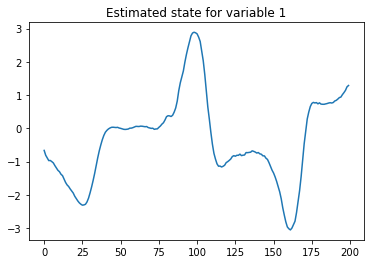

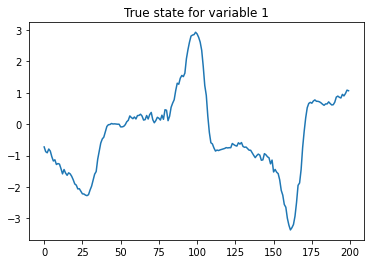

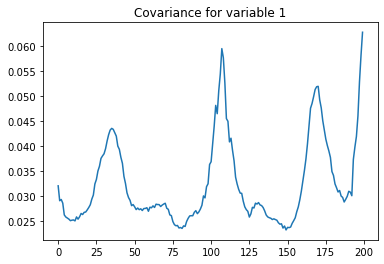

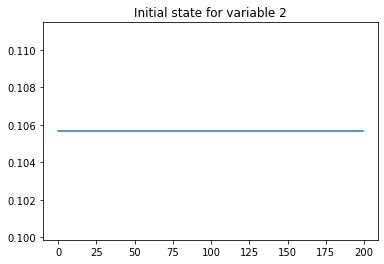

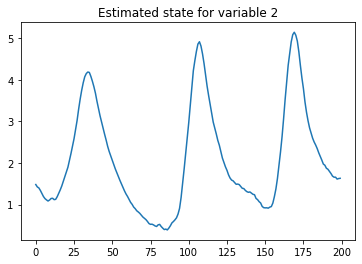

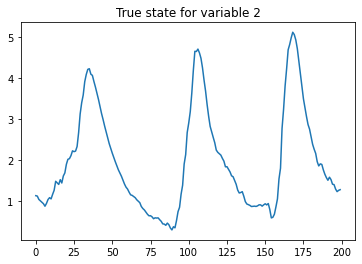

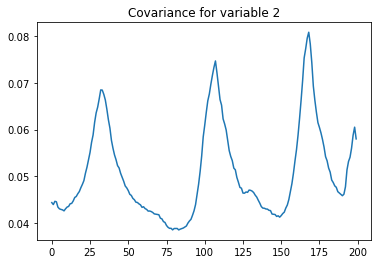

In [4]:
plt.figure()
plt.title('Initial state for variable 0')
plt.plot(init[100,0,:])

plt.figure()
plt.title('Estimated state for variable 0')
plt.plot(mu[100,0,:])

plt.figure()
plt.title('True state for variable 0')
plt.plot(target[100,0,:])

plt.figure()
plt.title('Covariance for variable 0')
plt.plot(1/((prec[100,0,:])*5)**2)


plt.figure()
plt.title('Initial state for variable 1')
plt.plot(init[100,1,:])

plt.figure()
plt.title('Estimated state for variable 1')
plt.plot(mu[100,1,:])

plt.figure()
plt.title('True state for variable 1')
plt.plot(target[100,1,:])

plt.figure()
plt.title('Covariance for variable 1')
plt.plot(1/(np.abs(prec[100,1,:])*5)**2)


plt.figure()
plt.title('Initial state for variable 2')
plt.plot(init[100,2,:])

plt.figure()
plt.title('Estimated state for variable 2')
plt.plot(mu[100,2,:])

plt.figure()
plt.title('True state for variable 2')
plt.plot(target[100,2,:])


plt.figure()
plt.title('Covariance for variable 2')
plt.plot(1/(np.abs(prec[100,2,:])*5)**2)




## Learned dynamical model

In [5]:
from models import Gradient_img, LitModel
import torch
ckpt_path ='Results/Experiment4/model_exp4.ckpt'
lit_cls = LitModel
mod = lit_cls.load_from_checkpoint(ckpt_path, 
                                                    mean_Tr=0, 
                                                    std_Tr = 0
                                                    )

In [6]:
mu_test = torch.zeros((2000,6,200))
mu_test[:,:3,:] = torch.Tensor(mu[:,:,:])
mu_test[:,3:,:] = torch.Tensor(prec[:,:,:])

target_test = torch.zeros((2000,6,200))+1
target_test[:,:3,:] = torch.Tensor(target[:,:,:])
target_test[:,3:,:] = torch.Tensor(prec[:,:,:])

dyn_mu = mod.model.phi_r(mu_test).detach().numpy()
dyn_target = mod.model.phi_r(target_test).detach().numpy()

/home/VM-Nicolas-Lafon/These/4Dvarnetstochastic/Lorenz63/models.py:59: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554798336/work/torch/csrc/utils/python_arg_parser.cpp:1005.)
  x   = torch.add(x,1.,xHR)


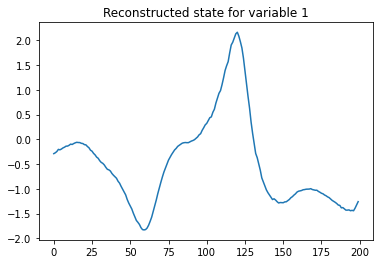

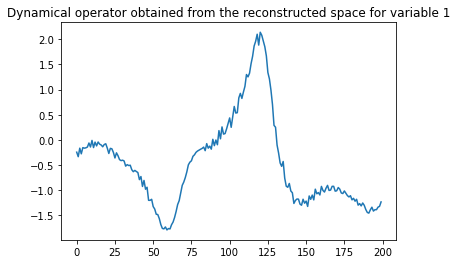

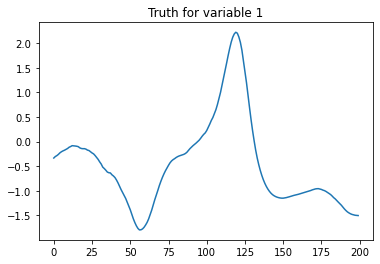

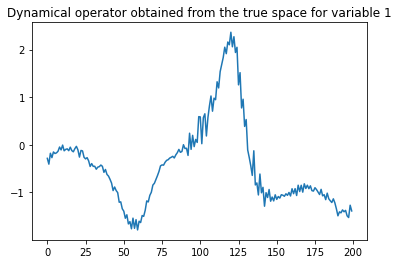

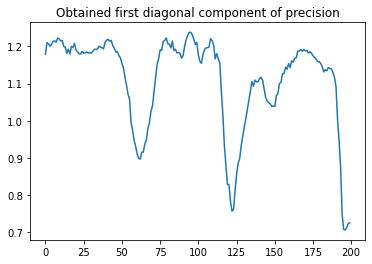

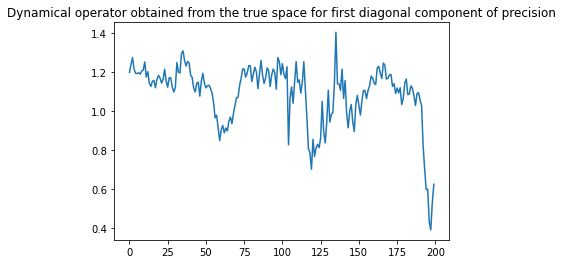

In [7]:
plt.figure()
plt.title("Reconstructed state for variable 1")
plt.plot(mu[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the reconstructed space for variable 1")
plt.plot(dyn_mu[0,0,:])

plt.figure()
plt.title("Truth for variable 1")
plt.plot(target[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the true space for variable 1")
plt.plot(dyn_target[0,0,:])



plt.figure()
plt.title("Obtained first diagonal component of precision")
plt.plot(np.abs(prec[0,1,:]))


plt.figure()
plt.title("Dynamical operator obtained from the true space for first diagonal component of precision")
plt.plot(np.abs(dyn_target[0,4,:]))




## Divergence between learned model in experiment 2 and 4

In [11]:
ncfile2 = Dataset('Results/Experiment2/test.nc')
target_wn = ncfile2['targets']
prec_wn = ncfile2['p_diag']

In [12]:
target_test_wn = torch.zeros((2000,6,200))+1
target_test_wn[:,:3,:] = torch.Tensor(target_wn[:,:,:])
target_test_wn[:,3:,:] = torch.Tensor(prec_wn[:,:,:])

dyn_target_wn = mod.model.phi_r(target_test_wn).detach().numpy()
print("Comparatif ODE-score")
print(np.mean((target[:,:,:]-dyn_target_wn[:,:3,:])**2)*7.51**2)

Comparatif ODE-score
9023.435096870422


## Scores assessment

In [13]:

stdTr =9.81

print("R-score")
print(np.mean((mu[:,:,:]-target[:,:,:])**2)*stdTr**2)
print("4DVar-score")
FourDScore = 0.01*np.mean((init[:,:,:]-mu[:,:,:])*masks[:,:,:])**2/(np.sum(masks[:,:,:])) + np.mean((mu[:,:,:]-dyn_mu[:,:3,:])**2)
print(FourDScore*stdTr**2)
print("ODE-score")
print(np.mean((target[:,:,:]-dyn_target[:,:3,:])**2)*stdTr**2)

R-score
3.5915017762664707
4DVar-score
0.22510660234118882
ODE-score
0.6589494356534444


In [16]:
#Likelihood score for the probability distribution (p-score)

def logarithmic_scores(t,mu,sig):
    return(0.5*(((t-mu)*sig*5)**2)-np.log(sig*5)+0.5*np.log(2*np.pi))

scores = np.mean(logarithmic_scores(target[:,:,:],mu[:,:,:],np.abs(prec[:,:,:])),0)

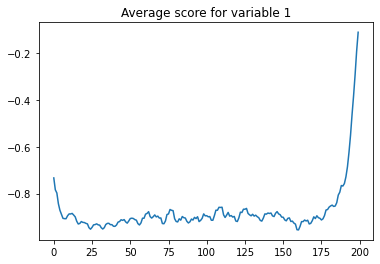

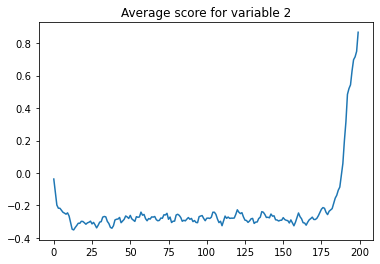

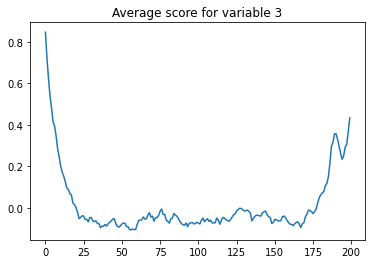

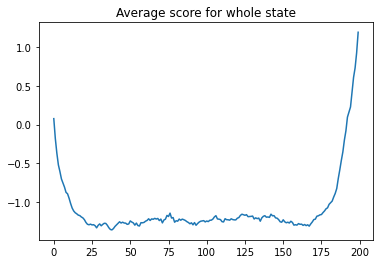

In [17]:
#Visualization of p-score evolution for each variable : :
plt.figure()
plt.title("Average score for variable 1")
plt.plot(scores[0,:])

plt.figure()
plt.title("Average score for variable 2")
plt.plot(scores[1,:])

plt.figure()
plt.title("Average score for variable 3")
plt.plot(scores[2,:])

state_score = np.sum(scores,0)
plt.figure()
plt.title("Average score for whole state")
plt.plot(state_score)


In [18]:
print("P-score")
print(np.mean(state_score))
print("P-score for the center of the window")
print(np.mean(state_score[75:100]))

P-score
-1.0966794550710914
P-score for the center of the window
-1.2446369756889344


# Experiment 5

We reconstruct the mean state and the full covariance of the Gaussian prior. The covariance is initialized to the diagonal covariance found in experiment 4. We observe only the first variable every 8 time steps with a Gaussian noise on the observations in $\sqrt2$, and a white noise governed by a Gamma parameter on the model. We use the scheme proposed by $\mathbf{Chapron\ et \ al.}$ $(2017)$. 

In [160]:
from dataloading_stochastic import X_test_obs,dataTestNoNaN
m = 1.036768928235696
s   =9.811712139795723
ncfile = Dataset('Results/Experiment5/test_exp5.nc')
print(ncfile)

mu = ncfile['preds']
prec = ncfile['p_diag']
prec_out = ncfile['p_outdiag']
init   = ncfile['inits']
target = ncfile['targets']
masks = ncfile['masks']
print(mu[:,:,:].shape)

p_state = np.zeros((2000,200,3,3))
ind_diag = np.array(([[0,1,2],[0,1,2]]))
ind_sup  = np.array(([[0,0,1],[1,2,2]]))
ind_inf  = np.array(([[1,2,2],[0,0,1]]))                 
                                 
p_state[:,:,ind_diag[0],ind_diag[1]] = np.transpose(prec[:,:,:],axes=[0,2,1])*5
p_state[:,:,ind_sup[0],ind_sup[1]] = np.transpose(prec_out[:,:,:],axes=[0,2,1])
p_state[:,:,ind_inf[0],ind_inf[1]] = np.transpose(prec_out[:,:,:],axes=[0,2,1])
                   
p_state = np.matmul(p_state ,p_state)
cov = np.linalg.inv(p_state)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Nb_samples(2000), time(3), x(200)
    variables(dimensions): float32 preds(Nb_samples, time, x), float32 p_diag(Nb_samples, time, x), float32 p_outdiag(Nb_samples, time, x), float32 inits(Nb_samples, time, x), float32 targets(Nb_samples, time, x), float32 masks(Nb_samples, time, x), float64 Nb_samples(Nb_samples), float64 time(time), float64 space(x)
    groups: 
(2000, 3, 200)


## Visualization of the temporal evolution for the three variables

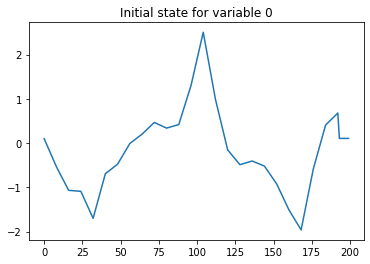

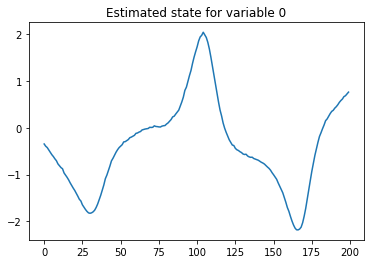

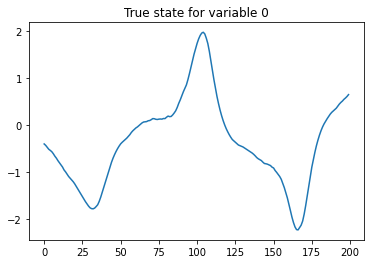

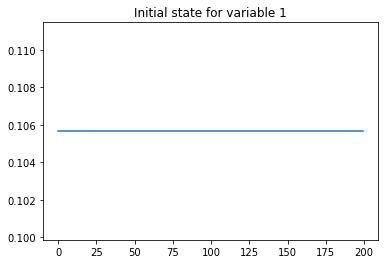

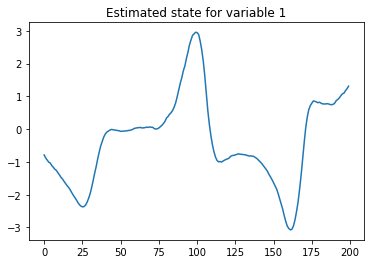

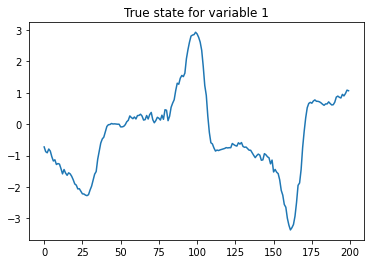

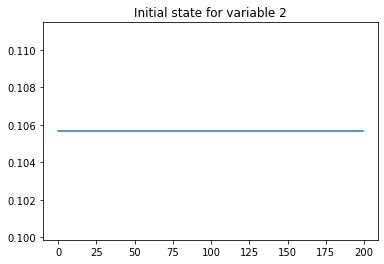

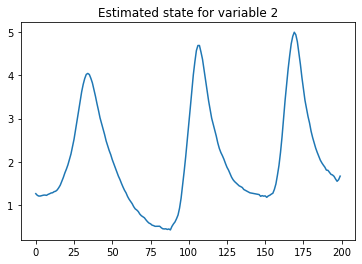

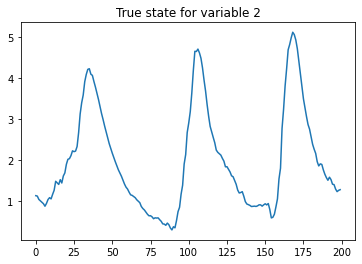

In [72]:
plt.close()

plt.figure()
plt.title('Initial state for variable 0')
plt.plot(init[100,0,:])

plt.figure()
plt.title('Estimated state for variable 0')
plt.plot(mu[100,0,:])

plt.figure()
plt.title('True state for variable 0')
plt.plot(target[100,0,:])

plt.figure()
plt.title('Initial state for variable 1')
plt.plot(init[100,1,:])

plt.figure()
plt.title('Estimated state for variable 1')
plt.plot(mu[100,1,:])

plt.figure()
plt.title('True state for variable 1')
plt.plot(target[100,1,:])

plt.figure()
plt.title('Initial state for variable 2')
plt.plot(init[100,2,:])

plt.figure()
plt.title('Estimated state for variable 2')
plt.plot(mu[100,2,:])

plt.figure()
plt.title('True state for variable 2')
plt.plot(target[100,2,:])
plt.show()

## Visualization of the temporal evolution for covariance values

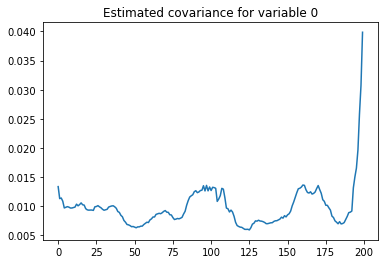

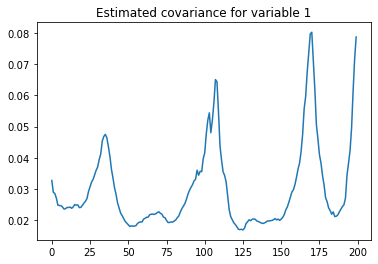

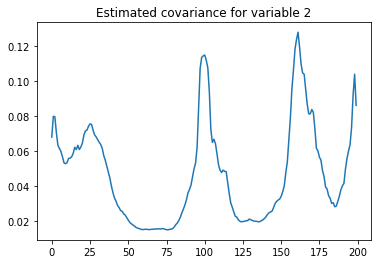

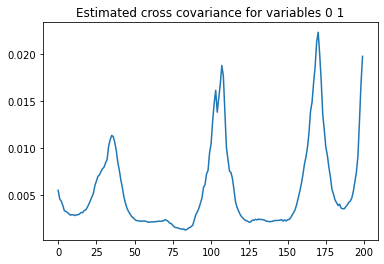

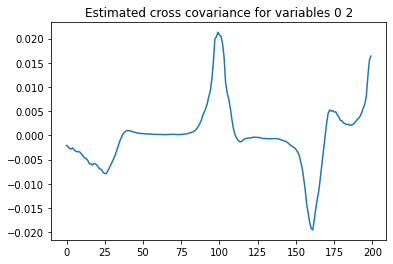

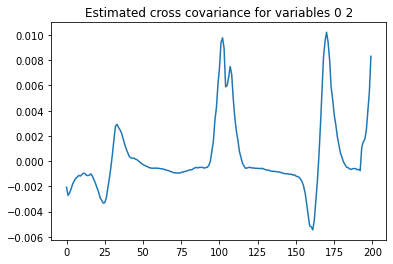

In [73]:
plt.figure()
plt.title('Estimated covariance for variable 0')
plt.plot(cov[100,:,0,0])

plt.figure()
plt.title('Estimated covariance for variable 1')
plt.plot(cov[100,:,1,1])


plt.figure()
plt.title('Estimated covariance for variable 2')
plt.plot(cov[100,:,2,2])

plt.figure()
plt.title('Estimated cross covariance for variables 0 1')
plt.plot(cov[100,:,0,1])

plt.figure()
plt.title('Estimated cross covariance for variables 0 2')
plt.plot(cov[100,:,0,2])

plt.figure()
plt.title('Estimated cross covariance for variables 0 2')
plt.plot(cov[100,:,1,2])



### Covering map visualization

(2000, 200, 3, 3)


<Figure size 432x288 with 0 Axes>

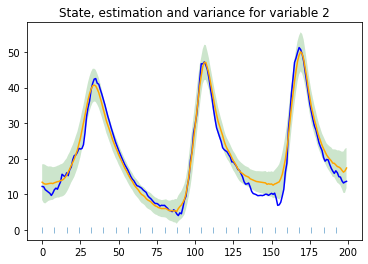

In [164]:
variable = 2
window = 100
print(cov.shape)
ci = s*1.96*np.sqrt(cov[window,:,variable,variable])
x = s*mu[window,variable,:]+m
plt.figure()
fig, ax = plt.subplots()

ax.fill_between(range(200), (x-ci), (x+ci), facecolor='g', alpha=0.2)
plt.title(f'State, estimation and variance for variable {variable}')
plt.plot(s*target[window,variable,:]+m,color='blue')
plt.plot(x,color='orange')
plt.scatter(np.arange(0,200,8),0*np.arange(0,200,8),marker ='|', linewidth=0.5,)
if variable ==0 :
    plt.scatter(np.arange(0,200,8),X_test_obs[window,variable,np.arange(0,200,8)],color='c')


## Learned dynamical model

In [5]:
from models import Gradient_img, LitModel
import torch

ckpt_path ='Results/Experiment5/model_exp5.ckpt'

lit_cls = LitModel

mod = lit_cls.load_from_checkpoint(ckpt_path, 
                                                    mean_Tr=0, 
                                                    std_Tr = 0
                                                    )


In [6]:
mu_test = torch.zeros((2000,9,200))
mu_test[:,:3,:] = torch.Tensor(mu[:,:,:])
mu_test[:,3:6,:] = torch.Tensor(prec[:,:,:])
mu_test[:,6:,:] = torch.Tensor(prec_out[:,:,:])

target_test = torch.zeros((2000,9,200))
target_test[:,:3,:] = torch.Tensor(target[:,:,:])
target_test[:,3:6,:] = torch.Tensor(prec[:,:,:])
target_test[:,6:,:] = torch.Tensor(prec_out[:,:,:])

dyn_mu = mod.model.phi_r(mu_test).detach().numpy()

dyn_target = mod.model.phi_r(target_test).detach().numpy()

/home/VM-Nicolas-Lafon/These/4Dvarnetstochastic/Lorenz63/models.py:59: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554798336/work/torch/csrc/utils/python_arg_parser.cpp:1005.)
  x   = torch.add(x,1.,xHR)


<Figure size 432x288 with 0 Axes>

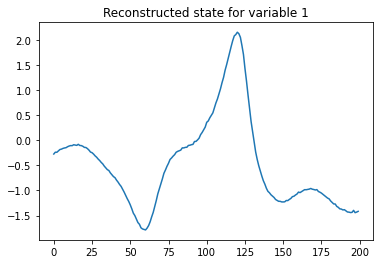

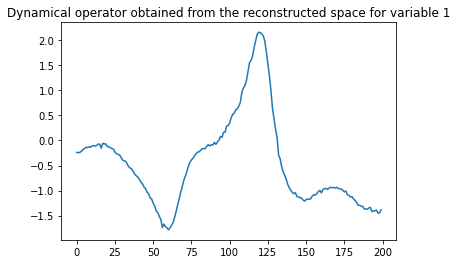

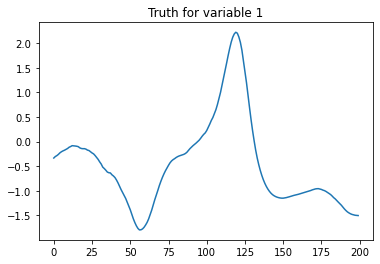

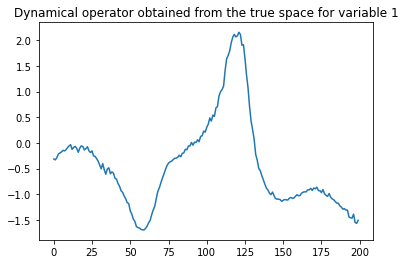

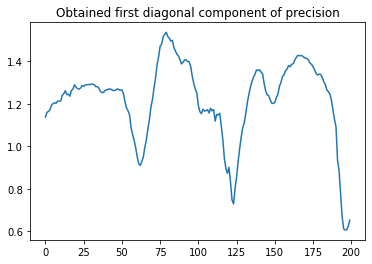

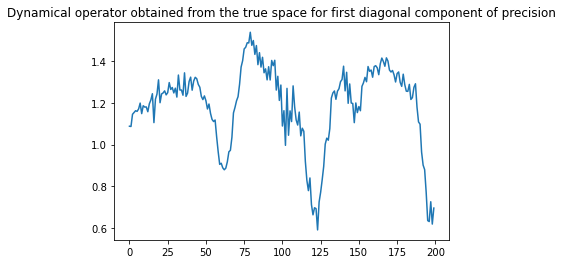

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure()
plt.title("Reconstructed state for variable 1")
plt.plot(mu[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the reconstructed space for variable 1")
plt.plot(dyn_mu[0,0,:])

plt.figure()
plt.title("Truth for variable 1")
plt.plot(target[0,0,:])

plt.figure()
plt.title("Dynamical operator obtained from the true space for variable 1")
plt.plot(dyn_target[0,0,:])

plt.figure()
plt.title("Obtained first diagonal component of precision")
plt.plot(np.abs(prec[0,1,:]))


plt.figure()
plt.title("Dynamical operator obtained from the true space for first diagonal component of precision")
plt.plot(np.abs(dyn_target[0,4,:]))

plt.figure()


## Scores assessement

In [8]:
#Scores on mean state

stdTr =9.81

print("R-score")
print(np.mean((mu[:,:,:]-target[:,:,:])**2)*stdTr**2)
print("4DVar-score")
FourDScore = 0.01*np.mean((init[:,:,:]-mu[:,:,:])*masks[:,:,:])**2/(np.sum(masks[:,:,:])) + np.mean((mu[:,:,:]-dyn_mu[:,:3,:])**2)
print(FourDScore*stdTr**2)
print("ODE-score")
print(np.mean((target[:,:,:]-dyn_target[:,:3,:])**2)*stdTr**2)


R-score
3.5105687285285447
4DVar-score
0.14472097294196062
ODE-score
0.48293022947120484


In [9]:
def log_scores_matrix(target,mu,prec):
    return(0.5*(np.dot((np.dot((target-mu).T,prec)),(target-mu)))-0.5*np.log(np.linalg.det(prec))+1.5*np.log(2*np.pi))

scores = np.zeros((mu.shape[0],mu.shape[2]))

for i in range(mu.shape[0]):
    for j in range(mu.shape[2]):
        scores[i,j] = log_scores_matrix(target[i,:,j],mu[i,:,j],p_state[i,j,:,:])
        


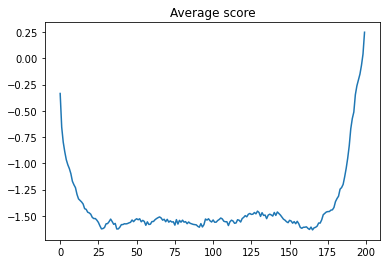

In [11]:
mean_score = np.mean(scores,0)

##Visualization of p-score evolution for each variable : :

plt.figure()
plt.title("Average score")
plt.plot(mean_score)


In [12]:
print("P-score")
print(np.mean(mean_score))
print("P-score for the center of the window")
print(np.mean(mean_score[75:100]))

P-score
-1.4235875205138462
P-score for the center of the window
-1.5680437841430594


## Confidence interval

In [15]:
cov_v1 = cov[:,:,0,0]
cov_v2 = cov[:,:,1,1]
cov_v3 = cov[:,:,2,2]
diff =np.abs(target[:,0,:]-mu[:,0,:])
print("First variable")
print("IC 1Sigma")
print(np.sum(diff**2>cov_v1)/400000)
print("IC 2Sigma")
print(np.sum(diff**2>2*cov_v1)/400000)
print("IC 3Sigma")
print(np.sum(diff**2>3*cov_v1)/400000)
print("Second variable")
diff =np.abs(target[:,1,:]-mu[:,1,:])
print("IC 1Sigma")
print(np.sum(diff**2>cov_v2)/400000)
print("IC 2Sigma")
print(np.sum(diff**2>2*cov_v2)/400000)
print("IC 3Sigma")
print(np.sum(diff**2>3*cov_v2)/400000)
diff =np.abs(target[:,2,:]-mu[:,2,:])
print("Third variable")
print("IC 1Sigma")
print(np.sum(diff**2>cov_v3)/400000)
print("IC 2Sigma")
print(np.sum(diff**2>2*cov_v3)/400000)
print("IC 3Sigma")
print(np.sum(diff**2>3*cov_v3)/400000)






First variable
IC 1Sigma
0.3171775
IC 2Sigma
0.157965
IC 3Sigma
0.085315
Second variable
IC 1Sigma
0.3461325
IC 2Sigma
0.18791
IC 3Sigma
0.11191
Third variable
IC 1Sigma
0.3617225
IC 2Sigma
0.1990925
IC 3Sigma
0.1174025


## 3D Lorenz butterfly plot

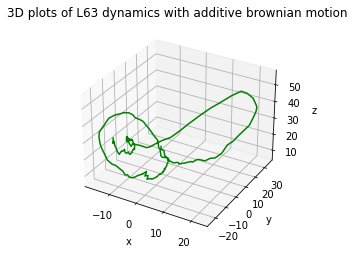

In [7]:
fig = plt.figure()
m = 1.036768928235696
s   =9.811712139795723

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = m+s*target[0,2,:]
x = m+s*target[0,0,:]
y = m+s*target[0,1,:]
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D plots of L63 dynamics with additive brownian motion')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

## Comparison with Ensemble Kalman Filter for stochastic Lorenz evolution

In [165]:
new_t =dataTestNoNaN
nb_obs = 3

R = (np.sqrt(2)* np.eye(3))**2
maskobs2 = np.zeros((2000,3,200))
maskobs2[:,1,:]=1
X_test_obs2 = X_test_obs + dataTestNoNaN*maskobs2+ np.sqrt(2) * maskobs2* np.random.randn(2000,3,200)
maskobs3 = np.zeros((2000,3,200))
maskobs3[:,2,:]=1
X_test_obs3 = X_test_obs2 + dataTestNoNaN*maskobs3+ np.sqrt(2) * maskobs3 * np.random.randn(2000,3,200)
print()
print(np.mean(((X_test_obs-dataTestNoNaN)[:,0,np.arange(0,200,8)])**2))    
print(np.mean(((X_test_obs3-dataTestNoNaN)[:,:,np.arange(0,200,8)])**2))    

dT = 200
dX = 3
N = 1000
N_test=2000

H1 = np.array([[1,0,0],[0,0,0],[0,0,0]])
H2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
H3 = np.array([[0,0,0],[0,0,0],[0,0,1]])
H = [H1,H2,H3]
H_all = np.eye(3)

#Choice of observation model
if nb_obs == 1: 
    x_obs = X_test_obs
    Hi=H1
elif nb_obs == 2:
    x_obs = X_test_obs2
    Hi=H1+ H2
elif nb_obs == 3:
    x_obs= X_test_obs3
    Hi= H_all



2.0022106027588142
2.002630906043301


In [166]:
import scipy
from scipy.integrate import solve_ivp
import sdeint


sigma = 10.0
rho = 28.0
beta = 8.0/3
gamma = 2

def Lorenz63s(z,t,sigma,rho,beta,gamma):
    """ Lorenz-63 dynamical model. 
    Args:
        z: the state. shape = (3,)
        t: time
        sigma, rho, beta, gamma: the parameters of L63s
    Returns:
        dzdt: dz/dt
    """
    x_1 = sigma*(z[1]-z[0])-4*z[0]/(2*gamma)
    x_2 = z[0]*(rho-z[2])-z[1]-4*z[0]/(2*gamma)
    x_3 = z[0]*z[1] - beta*z[2] -8*z[2]/(2*gamma)
    dzdt  = np.array([x_1,x_2,x_3])
    
    return dzdt

def Stoch_Lorenz_63(S,t,
                    sigma=sigma, 
                    rho = rho, 
                    beta = beta, 
                    gamma = gamma):
    """ Lorenz-63 dynamical model. """
    x_1 = sigma*(S[1]-S[0])-4*S[0]/(2*gamma);
    x_2 = S[0]*(rho-S[2])-S[1] -4*S[1]/(2*gamma);
    x_3 = S[0]*S[1] - beta*S[2] -8*S[2]/(2*gamma);
    dS  = np.array([x_1,x_2,x_3]);
    return dS

def brownian_process(S,t,
                     sigma=sigma, 
                     rho = rho,
                     beta = beta,
                     gamma = gamma):
    x_1 = 0.0;
    x_2 = (rho - S[2])/np.sqrt(gamma);
    x_3 = (S[1])/np.sqrt(gamma);
    dS  = np.array([x_1,x_2,x_3]);
    G = np.eye((3))
    np.fill_diagonal(G,dS)
    return G    


def f(x):
    S = sdeint.itoEuler(Stoch_Lorenz_63, 
                          brownian_process, 
                          y0 = x, 
                          tspan = np.arange(0,0.01+0.00001,0.01)
                        )
    return S[1,:]

In [167]:
def update(x,P,z, H, R, N):
    """
    Add a new measurement (z) to the kalman filter. If z is None, nothing
    is changed.
    Parameters
    ----------
    z : np.array
        measurement for this update.
    R : np.array, scalar, or None
        Optionally provide R to override the measurement noise for this
        one call, otherwise self.R will be used.
    """
    Ens = np.random.default_rng().multivariate_normal(x,P,N)
    
    dim_z = len(z)
    Ens_update = np.zeros((N, dim_z,1))
    A  = np.dot(P,np.transpose(H))
    K = np.linalg.inv(np.dot(H,A)+R)
    
    
    # transform sigma points into measurement space
    for i in range(N):
        diff = np.expand_dims(z - np.dot(H,x),-1)
        Ens_update[i,:,:] = np.expand_dims(Ens[i],-1) +np.dot(np.dot(A,K),diff)
    
    x_a = np.mean(Ens_update,axis=0)
    x_diff = Ens_update-x_a
    P_a = np.mean(np.matmul(x_diff,np.transpose(x_diff,axes=[0,2,1])),0)
    
    return x_a,P_a

def update2(x,P,z, H, R):
    A  = np.dot(P,np.transpose(H))
    S = np.linalg.inv(np.dot(H,A)+R)
    K = np.dot(A,S)
    x_a = x - np.dot(K,(np.dot(H,x)-z))
    x_a = np.expand_dims(x_a,-1)
    I = np.eye(3)
    P_a = np.dot(I-np.dot(K,H),P)
    return x_a, P_a

In [168]:
def forecast(x,P,fun,N):
    Ens = np.random.default_rng().multivariate_normal(x,P,N)
    dim_x = len(x)
    Ens_update = np.zeros((N, dim_x,1))
    for i in range(N):
        Ens_update[i,:,:]=np.expand_dims(fun(Ens[i]),-1)
     
    x_f = np.mean(Ens_update,axis=0)
    x_diff = Ens_update-x_f
    P_f = np.mean(np.matmul(x_diff,np.transpose(x_diff,axes=[0,2,1])),0)
    
    return x_f,P_f

### Covering map visualization

In [169]:
ind = 100
print(init.shape)
x_init =X_test_obs3[ind,:,0]
P_init=R   
x_tot = np.zeros((200,3))
P_tot = np.zeros((200,3,3))
x_tot[0,:]=x_init
P_tot [0,:,:] = P_init
for i in range(1,200):
    #print(P_tot[:5,:,:])
    x_f,P_f = forecast(x_init,P_init,f,N)
    if i%8==0:
        x_a,P_a = update2(x_f[:,0],P_f,x_obs[ind,:,i],Hi,R)
    else : 
        x_a,P_a = x_f,P_f
    x_tot[i,:]=x_a[:,0]
    P_tot[i,:,:] = P_a
    x_init = x_a[:,0]
    P_init = P_a
    print(np.mean((x_init-new_t[ind,:,i])**2))


(2000, 3, 200)
1.9172632269739418
1.5034257628894956
1.3074586051651103
0.8616032816038549
0.9388940131072561
1.8496300739544986
0.916453808898155
0.6809024600643013
2.0178890008126715
3.266327595853248
2.3244454948784026
1.465636088695143
7.282139056429311
5.965549109575474
7.073936033126134
0.688423847575376
2.521484530581406
1.7139085933958083
1.4741772727200664
0.4968684351161767
0.6306813684625848
1.210174087257255
2.7161356134409904
0.5192431097490386
1.2922181312138605
2.8329818443613504
3.8055962418174865
2.134148752735635
2.932360523274682
3.728974470015268
4.440776769359101
4.298482082347865
5.8188460885332915
6.306661144692651
7.149048485845067
5.178739556174515
6.834828915927687
4.8690420610730465
2.6177180472174215
1.9591546673868112
1.9943229420162272
1.7548939898156537
1.315946313766478
1.3791677872724717
1.096428155028262
0.8993224007085029
0.8210162181099419
0.640218375032276
0.6851370409413983
0.4010294533407614
0.4050154553686259
0.49443556351877954
1.000635341462815

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
Variance for each variable
[0.73867529 3.70298457 5.64381365]
R-score
3.3618245021866415
P-score
-1.7767226103924059


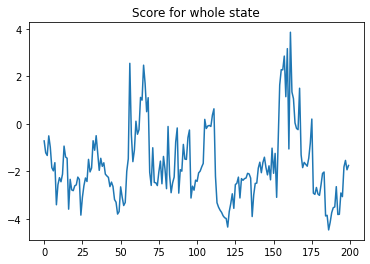

In [170]:
print(P_tot[0,:,:])

def log_scores_matrix(target,mu,prec):
    return(0.5*(np.dot((np.dot((target-mu).T,prec)),(target-mu)))-0.5*np.log(np.linalg.det(prec))+1.5*np.log(2*np.pi))


print("Variance for each variable")
print(np.mean((new_t[ind,:,:]-np.transpose(x_tot[:,:]))**2,1))
print("R-score")
print(np.mean((new_t[ind,:,:]-np.transpose(x_tot[:,:]))**2))
x_tot_n = (x_tot-m)/s
P_tot_n = P_tot/s**2
scores = np.zeros(200)

for j in range(200):  
    scores[j] = log_scores_matrix(target[ind,:,j],x_tot_n[j,:],np.linalg.inv((P_tot_n[j,:,:])))
    
plt.figure()
plt.title("Score for whole state")
plt.plot(scores)
    
print("P-score")
print(np.mean(scores))


(200, 3, 3)
(200, 3)


<Figure size 432x288 with 0 Axes>

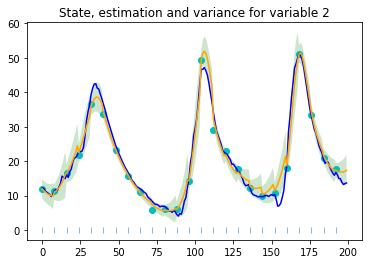

In [177]:
%matplotlib inline
variable = 2
print(P_tot.shape)
ci = 1.96*np.sqrt(P_tot[:,variable,variable])
print(x_tot_n.shape)
x = x_tot[:,variable]
plt.figure()
fig, ax = plt.subplots()

ax.fill_between(range(200), (x-ci), (x+ci), facecolor='g', alpha=0.2)
plt.title(f'State, estimation and variance for variable {variable}')
plt.plot(new_t[100,variable,:],color='blue')
plt.plot(x,color='orange')
plt.scatter(np.arange(0,200,8),0*np.arange(0,200,8),marker ='|', linewidth=0.5,)
#for y in np.arange(0,200,8):
#    plt.axvline(y, color = 'r', label = 'axvline - full height', linestyle=':')
plt.scatter(np.arange(0,200,8),X_test_obs3[100,variable,np.arange(0,200,8)],color='c')


### EnKF results for whole dataset

In [6]:
N_obs =3
if N_obs==1:
    Hi = H1 
elif N_obs ==2:
    Hi = H1 +H2
elif N_obs ==3 :
    Hi=H1+H2+H3
Mu_res = np.zeros((N_test,dT,dX))
P_res = np.zeros((N_test,dT,dX,dX))
c=0
Ind=np.random.permutation(2000)[:10]
for ind in Ind: 
    print(ind)
    x_init =x_obs[ind,:,0]
    P_init=R   
    x_tot = np.zeros((200,3))
    P_tot = np.zeros((200,3,3))
    x_tot[0,:]=x_init
    P_tot [0,:,:] = P_init
    for i in range(1,200):
        #print(P_tot[:5,:,:])
        x_f,P_f = forecast(x_init,P_init,f,N)
        if i%8==0:
            x_a,P_a = update2(x_f[:,0],P_f,x_obs[ind,:,i],Hi,R)
        else : 
            x_a,P_a = x_f,P_f
        x_tot[i,:]=x_a[:,0]
        P_tot[i,:,:] = P_a
        x_init = x_a[:,0]
        P_init = P_a
    print(np.mean((x_tot-np.transpose(dataTestNoNaN[ind,:,:]))**2))
    Mu_res[ind,:,:] = x_tot
    P_res[ind,:,:,:] = P_tot
    c+=1
    print(c)
        

756
2.445937830456149
1
1164
2.17232268696049
2
436
4.21185785949825
3
1927
4.787123827833134
4
1445
2.6962904715467473
5
1699
2.664665026779807
6
1153
3.0461255772189832
7
588
2.179734981054342
8
66
4.669353971504964
9
341
3.8408289927853434
10


(2000, 200, 3)
R-score
2.597487851743215
(10, 3, 200)


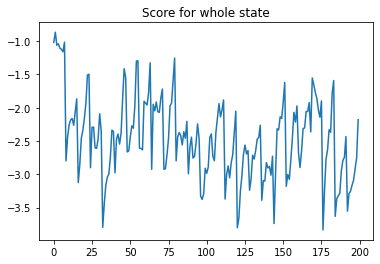

P-score
-2.455148407612905


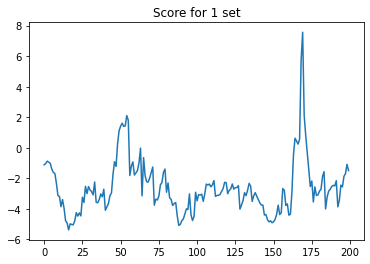

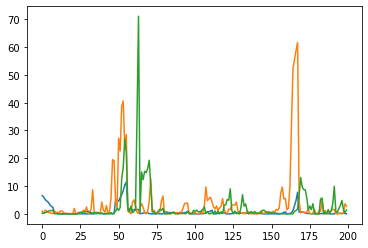

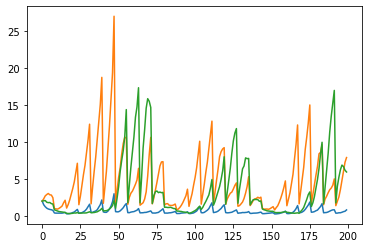

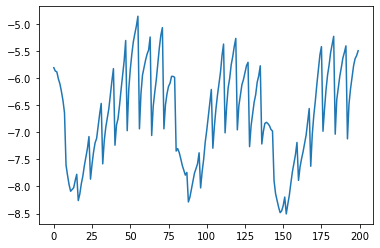

In [44]:
%matplotlib inline 
def log_scores_matrix(target,mu,prec):
    return(0.5*(np.dot((np.dot((target-mu).T,prec)),(target-mu)))-0.5*np.log(np.linalg.det(prec))+1.5*np.log(2*np.pi))

print(Mu_res.shape)
A = np.transpose(Mu_res[Ind,:,:],(0,2,1))
print("R-score")
print(np.mean((dataTestNoNaN[Ind,:,:]-A)**2))
scores_tot = np.zeros((10, 200))

for i in range(0,10):
    x_tot_n = (Mu_res[Ind[i],:,:]-m)/s
    P_tot_n = P_res[Ind[i],:,:,:]/s**2
    #print(P_tot_n[0:10,:,:])
    x_true_n= (dataTestNoNaN[Ind[i],:,:]-m)/s
    scores = np.zeros(200)           
    for j in range(200):  
        scores[j] = log_scores_matrix(x_true_n[:,j],x_tot_n[j,:],np.linalg.inv(P_tot_n[j,:,:]))
        #print(scores[j])
    scores_tot[i,:]=scores

print(((dataTestNoNaN[Ind,:,:]-A)**2).shape)
plt.figure()
plt.title("Score for whole state")
plt.plot(np.mean(scores_tot,0))
plt.show()

plt.figure()
plt.title("Score for 1 set")
plt.plot(scores_tot[0,:])
plt.figure()
plt.plot(((dataTestNoNaN[Ind,:,:]-A)**2)[0,0,:])
plt.plot(((dataTestNoNaN[Ind,:,:]-A)**2)[0,1,:])
plt.plot(((dataTestNoNaN[Ind,:,:]-A)**2)[0,2,:])
plt.figure()
plt.plot(P_res[Ind[0],:,0,0])
plt.plot(P_res[Ind[0],:,1,1])
plt.plot(P_res[Ind[0],:,2,2])
plt.figure()
plt.plot(-0.5*np.log(np.linalg.det(np.linalg.inv((P_res[Ind[0],:,:,:]/s**2)))))

print("P-score")
print(np.mean(scores_tot))              

## Confidence interval

In [47]:

diff = np.abs(np.transpose(dataTestNoNaN[Ind,:,:],(0,2,1))-Mu_res[Ind,:,:])**2
print(diff.shape)
sig = P_res[Ind,:,:,:]
#First Variable
print("First variable")
print("1-sig uncertainty")
print((np.sum(diff[:,:,0]>sig[:,:,0,0]))/2000)
print("2-sig uncertainty")
print((np.sum(diff[:,:,0]>2*sig[:,:,0,0]))/2000)
print("3-sig uncertainty")
print((np.sum(diff[:,:,0]>3*sig[:,:,0,0]))/2000)
#2nd variable
print("Second variable")
print("1-sig uncertainty")
print((np.sum(diff[:,:,1]>sig[:,:,1,1]))/2000)
print("2-sig uncertainty")
print((np.sum(diff[:,:,1]>2*sig[:,:,1,1]))/2000)
print("3-sig uncertainty")
print((np.sum(diff[:,:,1]>3*sig[:,:,1,1]))/2000)
#3rd variable
print("Third variable")
print("1-sig uncertainty")
print((np.sum(diff[:,:,2]>sig[:,:,2,2]))/2000)
print("2-sig uncertainty")
print((np.sum(diff[:,:,2]>2*sig[:,:,2,2]))/2000)
print("3-sig uncertainty")
print((np.sum(diff[:,:,2]>3*sig[:,:,2,2]))/2000)

(10, 200, 3)
1-sig uncertainty
0.34
2-sig uncertainty
0.1785
3-sig uncertainty
0.108
1-sig uncertainty
0.347
2-sig uncertainty
0.1805
3-sig uncertainty
0.105
1-sig uncertainty
0.3095
2-sig uncertainty
0.139
3-sig uncertainty
0.0705
